## Named Entity Recognition (NER)

### 1. NER with NLTK

You're now going to have some fun with named-entity recognition! Your task is to use `nltk` to find the named entities in an article.

What might the article be about, given the names you found?


### Imports

In [1]:
import nltk
nltk.download('punkt') # nltk.sent_tokenize and nltk.word_tokenize
nltk.download('averaged_perceptron_tagger') # nltk.pos_tag
nltk.download('maxent_ne_chunker') # nltk.ne_chunk_sents
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#### Instructions

- Tokenize article into sentences.
- Tokenize each sentence in sentences into words using a list comprehension.
- Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().
- Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). Along with pos_sentences, specify the additional keyword argument binary=True.
- Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.

Let's load a scraped news article into your workspace.

In [ ]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'


In [ ]:
# Tokenize the article into sentences using sent_tokenize and assign to variable sentences


# Tokenize each sentence into words using a list comprehension and word_tokenize and assign to variable token_sentences


# Tag each tokenized sentence into parts of speech using a list comprehension and pos_tag and assign to variable pos_sentences



# Create the named entity chunks and assign to variable chunked_sentences
# Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). 
# Along with pos_sentences, specify the additional keyword argument binary=True.


# Test for stems of the tree with 'NE' tags
# Loop over each sentence and each chunk, 
# and test whether it is a named-entity chunk by testing if it has the attribute label (hasattr(chunk, "label")), 
# and if the chunk.label() is equal to "NE". If so, print that chunk.
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### 2. Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a `defaultdict` called `ner_categories`, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called `chunked_sentences` similar to the last exercise, but this time with non-binary category names.

You can use `hasattr()` to determine if each chunk has a `'label'` and then simply use the chunk's `.label()` method as the dictionary key.

#### Imports

In [ ]:
from nltk.tree import Tree
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

The object `chunked_sentences` is a list of `Tree` objects

In [ ]:
chunked_sentences = [Tree('S', [('\ufeffImage', 'NN'), ('copyright', 'NN'), Tree('ORGANIZATION', [('EPA', 'NNP'), ('Image', 'NNP')]), ('caption', 'NN'), ('Uber', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('criticised', 'VBN'), ('many', 'JJ'), ('times', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('way', 'NN'), ('it', 'PRP'), ('runs', 'VBZ'), ('its', 'PRP$'), ('business', 'NN'), ('Ride-sharing', 'JJ'), ('firm', 'NN'), ('Uber', 'NNP'), ('is', 'VBZ'), ('facing', 'VBG'), ('a', 'DT'), ('criminal', 'JJ'), ('investigation', 'NN'), ('by', 'IN'), ('the', 'DT'), Tree('GPE', [('US', 'JJ')]), ('government', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('scrutiny', 'NN'), ('has', 'VBZ'), ('started', 'VBN'), ('because', 'IN'), ('the', 'DT'), ('firm', 'NN'), ('is', 'VBZ'), ('accused', 'VBN'), ('of', 'IN'), ('using', 'VBG'), ('``', '``'), ('secret', 'JJ'), ("''", "''"), ('software', 'NN'), ('that', 'WDT'), ('let', 'VBD'), ('it', 'PRP'), ('operate', 'VB'), ('in', 'IN'), ('regions', 'NNS'), ('where', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('banned', 'VBN'), ('or', 'CC'), ('restricted', 'VBN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('software', 'NN'), (',', ','), ('called', 'VBN'), ('``', '``'), ('greyball', 'NN'), ("''", "''"), (',', ','), ('helped', 'VBD'), ('it', 'PRP'), ('identify', 'VB'), ('officials', 'NNS'), ('seeking', 'VBG'), ('to', 'TO'), ('stop', 'VB'), ('the', 'DT'), ('service', 'NN'), ('running', 'VBG'), ('.', '.')]),
 Tree('S', [('A', 'DT'), ('spokesman', 'NN'), ('for', 'IN'), Tree('PERSON', [('Uber', 'NNP')]), ('declined', 'VBD'), ('to', 'TO'), ('comment', 'VB'), ('on', 'IN'), ('the', 'DT'), ('investigation', 'NN'), (',', ','), ('reported', 'VBD'), ('the', 'DT'), Tree('ORGANIZATION', [('Reuters', 'NNPS')]), ('news', 'NN'), ('agency', 'NN'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('claimed', 'VBN'), ('greyball', 'NN'), ('was', 'VBD'), ('used', 'VBN'), ('in', 'IN'), ('several', 'JJ'), ('areas', 'NNS'), (',', ','), ('including', 'VBG'), Tree('GPE', [('Portland', 'NNP')]), (',', ','), Tree('GPE', [('Oregon', 'NNP')]), (',', ','), ('where', 'WRB'), ('the', 'DT'), ('ride', 'NN'), ('service', 'NN'), ('was', 'VBD'), ('still', 'RB'), ('seeking', 'VBG'), ('official', 'JJ'), ('approval', 'NN'), ('to', 'TO'), ('operate', 'VB'), ('.', '.')]),
 Tree('S', [('Bookings', 'NNS'), ('blocked', 'VBN'), ('In', 'IN'), ('those', 'DT'), ('areas', 'NNS'), (',', ','), ('transport', 'NN'), ('regulation', 'NN'), ('officials', 'NNS'), ('posed', 'VBD'), ('as', 'IN'), ('passengers', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('bid', 'NN'), ('to', 'TO'), ('prove', 'VB'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('was', 'VBD'), ('operating', 'VBG'), ('illegally', 'RB'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Greyball', 'NNP')]), ('worked', 'VBD'), ('out', 'RP'), ('who', 'WP'), ('the', 'DT'), ('officials', 'NNS'), ('were', 'VBD'), ('and', 'CC'), ('blocked', 'VBD'), ('them', 'PRP'), ('from', 'IN'), ('booking', 'VBG'), ('rides', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('company', 'NN'), ("'s", 'POS'), ('drivers', 'NNS'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('a', 'DT'), ('letter', 'NN'), ('sent', 'VBN'), ('last', 'JJ'), ('week', 'NN'), ('to', 'TO'), ('transport', 'VB'), ('regulators', 'NNS'), ('in', 'IN'), Tree('GPE', [('Portland', 'NNP')]), (',', ','), Tree('PERSON', [('Uber', 'NNP')]), ('said', 'VBD'), ('it', 'PRP'), ('used', 'VBD'), ('the', 'DT'), ('greyball', 'NN'), ('software', 'NN'), ('``', '``'), ('exceedingly', 'RB'), ('sparingly', 'RB'), ("''", "''"), ('in', 'IN'), ('the', 'DT'), ('city', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('not', 'RB'), ('used', 'VBN'), ('it', 'PRP'), ('since', 'IN'), ('April', 'NNP'), ('2015', 'CD'), ('when', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('granted', 'VBN'), ('permission', 'NN'), ('to', 'TO'), ('operate', 'VB'), ('.', '.')]),
 Tree('S', [('Uber', 'NNP'), ("'s", 'POS'), ('use', 'NN'), ('of', 'IN'), ('the', 'DT'), ('software', 'NN'), ('was', 'VBD'), ('revealed', 'VBN'), ('by', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]), ('earlier', 'RBR'), ('this', 'DT'), ('year', 'NN'), ('.', '.')]),
 Tree('S', [('Uber', 'NNP'), ('defended', 'VBD'), ('its', 'PRP$'), ('use', 'NN'), ('in', 'IN'), ('a', 'DT'), ('blog', 'NN'), ('saying', 'VBG'), ('the', 'DT'), ('software', 'NN'), ('helped', 'VBD'), ('it', 'PRP'), ('work', 'VB'), ('out', 'RP'), ('if', 'IN'), ('a', 'DT'), ('ride', 'NN'), ('request', 'NN'), ('was', 'VBD'), ('legitimate', 'JJ'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('helped', 'VBD'), ('Uber', 'NNP'), ('limit', 'NN'), ('fraud', 'NN'), ('and', 'CC'), ('protect', 'NN'), ('drivers', 'NNS'), ('from', 'IN'), ('harm', 'NN'), (',', ','), ('it', 'PRP'), ('added', 'VBD'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('clear', 'JJ'), ('what', 'WP'), ('sanctions', 'VBZ'), ('Uber', 'NNP'), ('will', 'MD'), ('face', 'VB'), ('if', 'IN'), ('the', 'DT'), ('investigation', 'NN'), ('finds', 'VBZ'), ('that', 'IN'), ('it', 'PRP'), ('did', 'VBD'), ('act', 'VB'), ('illegally', 'RB'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('criminal', 'JJ'), ('inquiry', 'NN'), ('comes', 'VBZ'), ('at', 'IN'), ('a', 'DT'), ('difficult', 'JJ'), ('time', 'NN'), ('for', 'IN'), ('Uber', 'NNP'), ('which', 'WDT'), ('has', 'VBZ'), ('faced', 'VBN'), ('criticism', 'NN'), ('on', 'IN'), ('many', 'JJ'), ('fronts', 'NNS'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('currently', 'RB'), ('fighting', 'VBG'), ('a', 'DT'), ('lawsuit', 'NN'), ('from', 'IN'), ('Google-backed', 'JJ'), ('self-driving', 'JJ'), ('car', 'NN'), ('firm', 'NN'), ('Waymo.Despite', 'NNP'), ('all', 'PDT'), ('the', 'DT'), ('current', 'JJ'), ('hype', 'NN'), ('about', 'IN'), ('the', 'DT'), ('rise', 'NN'), ('of', 'IN'), ('voice-assisted', 'JJ'), ('devices', 'NNS'), ('using', 'VBG'), Tree('PERSON', [('Alexa', 'NNP')]), ('and', 'CC'), Tree('PERSON', [('Siri', 'NNP')]), (',', ','), ('linguistics', 'VBZ'), ('researcher', 'JJR'), Tree('PERSON', [('Rachael', 'NNP'), ('Tatman', 'NNP')]), ('found', 'VBD'), ('people', 'NNS'), ('complaining', 'VBG'), ('on', 'IN'), ('social', 'JJ'), ('media', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('technology', 'NN'), ('still', 'RB'), ('doesn', 'VBZ'), ('’', 'JJ'), ('t', 'NN'), ('understand', 'VBP'), ('them', 'PRP'), ('.', '.')]),
 Tree('S', [('That', 'DT'), ('’', 'VBZ'), ('s', 'JJ'), ('especially', 'RB'), ('true', 'JJ'), ('with', 'IN'), ('regional', 'JJ'), ('accents', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('who', 'WP'), ('live', 'VBP'), ('in', 'IN'), ('the', 'DT'), Tree('LOCATION', [('South', 'NNP')]), ('or', 'CC'), ('are', 'VBP'), ('from', 'IN'), ('countries', 'NNS'), ('like', 'IN'), Tree('ORGANIZATION', [('New', 'NNP'), ('Zealand', 'NNP')]), (',', ','), Tree('PERSON', [('Tatman', 'NNP')]), ('said', 'VBD'), ('last', 'JJ'), ('week', 'NN'), ('during', 'IN'), ('a', 'DT'), ('conference', 'NN'), ('in', 'IN'), Tree('GPE', [('San', 'NNP'), ('Francisco', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'RB'), ('So', 'RB'), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('whatever', 'NN'), ('the', 'DT'), ('opposite', 'NN'), ('of', 'IN'), ('delight', 'NN'), ('is', 'VBZ'), ('as', 'IN'), ('a', 'DT'), ('user', 'NN'), ('experience', 'NN'), (',', ','), ('”', 'NNP'), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“', 'JJ'), ('People', 'NNS'), ('are', 'VBP'), ('so', 'RB'), ('upset', 'JJ'), ('that', 'IN'), ('they', 'PRP'), ('’', 'VBP'), ('re', 'VBP'), ('going', 'VBG'), ('on', 'IN'), Tree('PERSON', [('Twitter', 'NNP')]), ('and', 'CC'), ('yelling', 'VBG'), ('about', 'IN'), ('it.', 'JJ'), ('”', 'NNP'), Tree('PERSON', [('Tatman', 'NNP')]), (',', ','), ('a', 'DT'), ('doctoral', 'JJ'), ('candidate', 'NN'), ('with', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('University', 'NNP')]), ('of', 'IN'), Tree('GPE', [('Washington', 'NNP')]), ('’', 'NNP'), ('s', 'VBP'), ('linguistics', 'NNS'), ('department', 'NN'), (',', ','), ('was', 'VBD'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('speakers', 'NNS'), ('at', 'IN'), ('a', 'DT'), ('two-day', 'JJ'), Tree('PERSON', [('Virtual', 'NNP'), ('Assistant', 'NNP'), ('Summit', 'NNP')]), (',', ','), ('which', 'WDT'), ('wrapped', 'VBD'), ('up', 'RP'), ('Friday', 'NNP'), ('at', 'IN'), ('the', 'DT'), Tree('FACILITY', [('Park', 'NNP'), ('Central', 'NNP'), ('Hotel', 'NNP')]), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('conference', 'NN'), (',', ','), ('and', 'CC'), ('an', 'DT'), ('adjacent', 'JJ'), ('Deep', 'NNP'), ('Learning', 'NNP'), ('Summit', 'NNP'), (',', ','), ('drew', 'VBD'), ('about', 'IN'), ('600', 'CD'), ('people', 'NNS'), ('representing', 'VBG'), ('companies', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('working', 'VBG'), ('on', 'IN'), ('advancing', 'VBG'), ('artificial', 'JJ'), ('intelligence', 'NN'), (',', ','), ('machine', 'NN'), ('learning', 'NN'), ('and', 'CC'), ('robotics', 'NNS'), ('.', '.')]),
 Tree('S', [('Lots', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('are', 'VBP'), ('already', 'RB'), ('using', 'VBG'), ('those', 'DT'), ('technologies', 'NNS'), ('in', 'IN'), ('programs', 'NNS'), ('like', 'IN'), Tree('PERSON', [('Apple', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), Tree('PERSON', [('Siri', 'NNP')]), ('.', '.')]),
 Tree('S', [('They', 'PRP'), ('are', 'VBP'), ('moving', 'VBG'), ('beyond', 'IN'), ('mobile', 'JJ'), ('phones', 'NNS'), ('and', 'CC'), ('into', 'IN'), ('smart-home', 'JJ'), ('devices', 'NNS'), ('like', 'IN'), Tree('PERSON', [('Amazon', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), Tree('PERSON', [('Echo', 'NNP')]), ('.', '.')]),
 Tree('S', [('Other', 'JJ'), ('fast-changing', 'JJ'), ('technologies', 'NNS'), ('include', 'VBP'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('and', 'CC'), ('consumer', 'NN'), ('robotics', 'NNS'), (',', ','), ('especially', 'RB'), ('with', 'IN'), ('self-driving', 'JJ'), ('cars', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('horizon', 'NN'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('there', 'EX'), ('’', 'NNP'), ('s', 'NN'), ('still', 'RB'), ('work', 'VB'), ('to', 'TO'), ('be', 'VB'), ('done', 'VBN'), ('in', 'IN'), ('each', 'DT'), ('of', 'IN'), ('those', 'DT'), ('areas', 'NNS'), (',', ','), ('speakers', 'NNS'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('For', 'IN'), ('example', 'NN'), (',', ','), ('artificial', 'JJ'), ('speech', 'NN'), ('recognition', 'NN'), ('technologies', 'NNS'), ('still', 'RB'), ('fall', 'VBP'), ('short', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('way', 'NN'), ('humans', 'NNS'), ('can', 'MD'), ('quickly', 'RB'), ('learn', 'VB'), ('and', 'CC'), ('discern', 'VB'), ('speech', 'NN'), ('patterns', 'NNS'), ('from', 'IN'), ('each', 'DT'), ('other', 'JJ'), ('in', 'IN'), ('“', 'NNP'), ('as', 'RB'), ('little', 'JJ'), ('as', 'IN'), ('two', 'CD'), ('sentences', 'NNS'), (',', ','), ('”', 'NNP'), Tree('PERSON', [('Tatman', 'NNP')]), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('that', 'DT'), ('’', 'VBD'), ('s', 'NN'), ('because', 'IN'), ('humans', 'NNS'), ('take', 'VBP'), ('into', 'IN'), ('account', 'NN'), ('other', 'JJ'), ('factors', 'NNS'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('the', 'DT'), ('gender', 'NN'), ('of', 'IN'), ('person', 'NN'), ('talking', 'VBG'), ('or', 'CC'), ('whether', 'IN'), ('they', 'PRP'), ('’', 'VBP'), ('ve', 'RB'), ('previously', 'RB'), ('met', 'VBN'), ('someone', 'NN'), ('from', 'IN'), ('the', 'DT'), ('the', 'DT'), ('same', 'JJ'), ('region', 'NN'), (',', ','), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Tatman', 'NNP')]), ('examined', 'VBD'), Tree('ORGANIZATION', [('YouTube', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), ('automatic', 'JJ'), ('captioning', 'NN'), ('program', 'NN'), (',', ','), ('which', 'WDT'), ('can', 'MD'), ('translate', 'VB'), ('spoken', 'JJ'), ('words', 'NNS'), ('into', 'IN'), ('text', 'NN'), ('in', 'IN'), ('several', 'JJ'), ('languages', 'NNS'), ('.', '.')]),
 Tree('S', [('She', 'PRP'), ('found', 'VBD'), ('that', 'IN'), ('more', 'RBR'), ('errors', 'NNS'), ('showed', 'VBD'), ('up', 'RP'), ('in', 'IN'), ('translations', 'NNS'), ('from', 'IN'), ('speakers', 'NNS'), ('who', 'WP'), ('had', 'VBD'), ('a', 'DT'), Tree('GPE', [('Southern', 'JJ')]), ('accent', 'NN'), ('than', 'IN'), ('from', 'IN'), ('people', 'NNS'), ('who', 'WP'), ('lived', 'VBD'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'VB'), ('The', 'DT'), Tree('GPE', [('South', 'NNP')]), ('is', 'VBZ'), ('the', 'DT'), ('largest', 'JJS'), ('demographic', 'JJ'), ('region', 'NN'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), (',', ','), ('”', 'NNP'), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('If', 'IN'), ('you', 'PRP'), ('’', 'VBP'), ('re', 'VB'), ('using', 'VBG'), ('a', 'DT'), ('voice-based', 'JJ'), ('virtual', 'JJ'), ('assistant', 'NN'), ('and', 'CC'), ('you', 'PRP'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('deal', 'NN'), ('with', 'IN'), Tree('GPE', [('Southern', 'NNP')]), ('speech', 'NN'), (',', ','), ('you', 'PRP'), ('’', 'VBP'), ('re', 'VB'), ('going', 'VBG'), ('to', 'TO'), ('have', 'VB'), ('problems', 'NNS'), ('reaching', 'VBG'), ('this', 'DT'), ('market.', 'NN'), ('”', 'NN'), ('For', 'IN'), ('businesses', 'NNS'), ('trying', 'VBG'), ('to', 'TO'), ('serve', 'VB'), ('those', 'DT'), ('markets', 'NNS'), (',', ','), ('speech', 'JJ'), ('recognition', 'NN'), ('technology', 'NN'), ('could', 'MD'), ('be', 'VB'), ('crucial', 'JJ'), ('to', 'TO'), ('future', 'JJ'), ('revenue', 'NN'), (',', ','), ('said', 'VBD'), Tree('PERSON', [('Stephen', 'NNP'), ('Scarr', 'NNP')]), (',', ','), Tree('ORGANIZATION', [('CEO', 'NNP')]), ('of', 'IN'), ('search', 'NN'), ('services', 'NNS'), ('Info.com', 'NNP'), ('and', 'CC'), Tree('ORGANIZATION', [('eContext', 'NN')]), ('.', '.')]),
 Tree('S', [('With', 'IN'), ('20', 'CD'), ('percent', 'NN'), ('of', 'IN'), ('all', 'DT'), ('searches', 'NNS'), ('already', 'RB'), ('done', 'VBN'), ('through', 'IN'), ('voice', 'NN'), (',', ','), ('“', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('really', 'RB'), ('important', 'JJ'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('No', 'DT'), ('.', '.')]),
 Tree('S', [('1', 'CD'), ('on', 'IN'), ('your', 'PRP$'), ('radar', 'NN'), (',', ','), ('”', 'NNP'), Tree('PERSON', [('Scarr', 'NNP')]), ('told', 'VBD'), ('the', 'DT'), ('developers', 'NNS'), ('.', '.')]),
 Tree('S', [('As', 'IN'), ('an', 'DT'), ('example', 'NN'), ('of', 'IN'), ('the', 'DT'), ('challenge', 'NN'), (',', ','), ('a', 'DT'), ('recent', 'JJ'), Tree('ORGANIZATION', [('YouTube', 'NNP')]), ('video', 'NN'), ('showed', 'VBD'), Tree('PERSON', [('Amazon', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), Tree('PERSON', [('Alexa', 'NNP')]), ('misunderstanding', 'VBG'), ('a', 'DT'), ('young', 'JJ'), ('boy', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('request', 'NN'), ('to', 'TO'), ('play', 'VB'), ('a', 'DT'), ('song', 'NN'), (',', ','), ('and', 'CC'), ('instead', 'RB'), ('offering', 'NN'), ('to', 'TO'), ('play', 'VB'), ('an', 'DT'), ('audio', 'JJ'), ('porn', 'NN'), ('channel', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('conference', 'NN'), ('touched', 'VBD'), ('on', 'IN'), ('more', 'RBR'), ('than', 'IN'), ('just', 'RB'), ('speech', 'JJ'), ('technologies', 'NNS'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Alonso', 'NNP')]), Tree('ORGANIZATION', [('Martinez', 'NNP')]), (',', ','), ('a', 'DT'), ('Pixar', 'NNP'), ('Animation', 'NNP'), ('Studios', 'NNP'), ('technical', 'JJ'), ('director', 'NN'), (',', ','), ('said', 'VBD'), ('robot', 'NN'), ('developers', 'NNS'), ('could', 'MD'), ('take', 'VB'), ('cues', 'NNS'), ('from', 'IN'), ('the', 'DT'), ('ways', 'NNS'), ('animators', 'NNS'), ('create', 'VBP'), ('deep', 'JJ'), ('emotional', 'JJ'), ('connections', 'NNS'), ('with', 'IN'), ('audiences', 'NNS'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('When', 'WRB'), ('you', 'PRP'), ('’', 'VBP'), ('re', 'VB'), ('thinking', 'VBG'), ('about', 'IN'), ('a', 'DT'), ('robot', 'NN'), (',', ','), ('don', 'VB'), ('’', 'JJ'), ('t', 'NN'), ('think', 'VBP'), ('about', 'IN'), ('it', 'PRP'), ('as', 'IN'), ('a', 'DT'), ('generic', 'JJ'), (',', ','), ('faceless', 'JJ'), ('thing', 'NN'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Martinez', 'NNP')]), (',', ','), ('who', 'WP'), ('developed', 'VBD'), ('characters', 'NNS'), ('in', 'IN'), ('“', 'NNP'), ('Up', 'NNP'), ('”', 'NNP'), ('and', 'CC'), ('“', 'NNP'), ('Inside', 'NNP'), ('Out', 'NNP'), (',', ','), ('”', 'NNP'), ('two', 'CD'), ('of', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Emeryville', 'NNP')]), ('company', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('hit', 'VBD'), ('movies', 'NNS'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('You', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('ask', 'VB'), ('what', 'WP'), ('makes', 'VBZ'), ('them', 'PRP'), ('admirable', 'JJ'), ('.', '.')]),
 Tree('S', [('What', 'WP'), ('are', 'VBP'), ('the', 'DT'), ('values', 'NNS'), ('that', 'IN'), ('they', 'PRP'), ('have', 'VBP'), ('that', 'DT'), ('I', 'PRP'), ('wish', 'VBP'), ('that', 'IN'), ('I', 'PRP'), ('had', 'VBD'), ('in', 'IN'), ('myself', 'PRP'), ('?', '.'), ('”', "''"), Tree('PERSON', [('Elena', 'NNP'), ('Corina', 'NNP'), ('Grigore', 'NNP')]), ('of', 'IN'), Tree('ORGANIZATION', [('Yale', 'NNP'), ('University', 'NNP')]), ('’', 'NNP'), ('s', 'VBZ'), Tree('PERSON', [('Social', 'NNP'), ('Robotics', 'NNP'), ('Lab', 'NNP')]), ('said', 'VBD'), ('robots', 'NNS'), ('now', 'RB'), ('used', 'VBN'), ('in', 'IN'), ('manufacturing', 'NN'), ('can', 'MD'), ('work', 'VB'), ('by', 'IN'), ('themselves', 'PRP'), ('because', 'IN'), ('they', 'PRP'), ('are', 'VBP'), ('easily', 'RB'), ('trained', 'VBN'), ('to', 'TO'), ('perform', 'VB'), ('specialized', 'JJ'), (',', ','), ('repetitive', 'JJ'), ('tasks', 'NNS'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('robots', 'NNS'), ('are', 'VBP'), ('not', 'RB'), ('well-equipped', 'JJ'), ('to', 'TO'), ('collaborate', 'VB'), ('with', 'IN'), ('humans', 'NNS'), (',', ','), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('That', 'DT'), ('’', 'VBZ'), ('s', 'JJ'), ('slowly', 'RB'), ('changing', 'VBG'), ('with', 'IN'), ('advances', 'NNS'), ('in', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('.', '.')]),
 Tree('S', [('As', 'IN'), ('an', 'DT'), ('example', 'NN'), (',', ','), Tree('PERSON', [('Grigore', 'NNP')]), ('played', 'VBD'), ('a', 'DT'), ('video', 'NN'), ('of', 'IN'), ('a', 'DT'), ('robot', 'NN'), ('trained', 'VBN'), ('to', 'TO'), ('help', 'VB'), ('a', 'DT'), ('person', 'NN'), ('with', 'IN'), ('what', 'WP'), ('can', 'MD'), ('be', 'VB'), ('a', 'DT'), ('complex', 'JJ'), ('and', 'CC'), ('maddening', 'VBG'), ('task', 'NN'), ('—', 'NNP'), ('assembling', 'VBG'), ('a', 'DT'), ('chair', 'NN'), ('from', 'IN'), Tree('GPE', [('Ikea', 'NNP')]), ('.', '.')]),
 Tree('S', [('Still', 'RB'), (',', ','), Tree('PERSON', [('Grigore', 'NNP')]), ('said', 'VBD'), (',', ','), ('“', 'NNP'), ('We', 'PRP'), ('’', 'VBP'), ('re', 'JJ'), ('not', 'RB'), ('getting', 'VBG'), ('replaced', 'VBN'), ('by', 'IN'), ('robots', 'NNS'), ('anytime', 'RB'), ('soon', 'RB'), ('.', '.')]),
 Tree('S', [('We', 'PRP'), ('’', 'VBP'), ('re', 'JJ'), ('not', 'RB'), ('at', 'IN'), ('a', 'DT'), ('point', 'NN'), ('where', 'WRB'), ('the', 'DT'), ('robots', 'NNS'), ('have', 'VBP'), ('the', 'DT'), ('intelligence', 'NN'), ('or', 'CC'), ('the', 'DT'), ('physical', 'JJ'), ('capabilities', 'NNS'), ('necessary', 'JJ'), ('to', 'TO'), ('perform', 'VB'), ('all', 'DT'), ('of', 'IN'), ('these', 'DT'), ('actions', 'NNS'), ('on', 'IN'), ('their', 'PRP$'), ('own', 'JJ'), ('.', '.')]),
 Tree('S', [('Anything', 'NN'), ('that', 'WDT'), ('is', 'VBZ'), ('related', 'VBN'), ('to', 'TO'), ('common', 'JJ'), ('sense', 'NN'), ('or', 'CC'), ('creativity', 'NN'), ('or', 'CC'), ('types', 'NNS'), ('of', 'IN'), ('thinking', 'NN'), ('that', 'IN'), ('require', 'VBZ'), ('on-the-spot', 'JJ'), ('flexibility', 'NN'), ('in', 'IN'), ('a', 'DT'), ('dynamic', 'JJ'), ('and', 'CC'), ('changing', 'VBG'), ('environment', 'NN'), ('is', 'VBZ'), ('still', 'RB'), ('very', 'RB'), ('hard', 'JJ'), ('to', 'TO'), ('achieve', 'VB'), ('for', 'IN'), ('us.', 'JJ'), ('”', 'NNP'), Tree('PERSON', [('Benny', 'NNP'), ('Evangelista', 'NNP')]), ('is', 'VBZ'), ('a', 'DT'), Tree('GPE', [('San', 'NNP')]), ('Francisco', 'NNP'), ('Chronicle', 'NNP'), ('staff', 'NN'), ('writer', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Email', 'NN')]), (':', ':'), ('bevangelista', 'NN'), ('@', 'NNP'), ('sfchronicle.com', 'NN'), ('Twitter', 'NN'), (':', ':'), ('@', 'NN'), ('ChronicleBenny', 'NNP'), ('The', 'DT'), Tree('GPE', [('French', 'JJ')]), ('electorate', 'NN'), ('heads', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('polls', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('second', 'JJ'), ('round', 'NN'), ('of', 'IN'), ('presidential', 'JJ'), ('elections', 'NNS'), ('on', 'IN'), ('May', 'NNP'), ('7', 'CD'), (',', ','), ('followed', 'VBN'), ('by', 'IN'), ('votes', 'NNS'), ('in', 'IN'), Tree('GPE', [('Britain', 'NNP')]), ('and', 'CC'), Tree('GPE', [('Germany', 'NNP')]), ('in', 'IN'), ('the', 'DT'), ('coming', 'JJ'), ('months', 'NNS'), ('.', '.')]),
 Tree('S', [('Computer', 'NNP'), ('scientists', 'NNS'), (',', ','), ('tech', 'JJ'), ('giants', 'NNS'), ('and', 'CC'), ('start-ups', 'NNS'), ('are', 'VBP'), ('using', 'VBG'), ('sophisticated', 'JJ'), ('algorithms', 'NN'), ('and', 'CC'), ('reams', 'NN'), ('of', 'IN'), ('online', 'NN'), ('data', 'NNS'), ('to', 'TO'), ('quickly', 'RB'), ('—', 'VB'), ('and', 'CC'), ('automatically', 'RB'), ('—', 'JJ'), ('spot', 'NN'), ('fake', 'JJ'), ('news', 'NN'), ('faster', 'RBR'), ('than', 'IN'), ('traditional', 'JJ'), ('fact-checking', 'JJ'), ('groups', 'NNS'), ('can', 'MD'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('The', 'DT'), ('goal', 'NN'), (',', ','), ('experts', 'NNS'), ('say', 'VBP'), (',', ','), ('is', 'VBZ'), ('to', 'TO'), ('expand', 'VB'), ('these', 'DT'), ('digital', 'JJ'), ('tools', 'NNS'), ('across', 'IN'), Tree('GPE', [('Europe', 'NNP')]), (',', ','), ('so', 'IN'), ('the', 'DT'), ('region', 'NN'), ('can', 'MD'), ('counter', 'VB'), ('the', 'DT'), ('fake', 'JJ'), ('news', 'NN'), ('that', 'WDT'), ('caused', 'VBD'), ('so', 'RB'), ('much', 'JJ'), ('confusion', 'NN'), ('and', 'CC'), ('anger', 'NN'), ('during', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('presidential', 'JJ'), ('election', 'NN'), ('in', 'IN'), ('November', 'NNP'), (',', ','), ('when', 'WRB'), ('outright', 'MD'), ('false', 'VB'), ('reports', 'NNS'), ('routinely', 'RB'), ('spread', 'VBP'), ('like', 'IN'), ('wildfire', 'NN'), ('on', 'IN'), Tree('ORGANIZATION', [('Facebook', 'NNP')]), ('and', 'CC'), Tree('PERSON', [('Twitter', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'NN'), Tree('PERSON', [('Algorithms', 'NNP')]), ('will', 'MD'), ('have', 'VB'), ('to', 'TO'), ('do', 'VB'), ('a', 'DT'), ('lot', 'NN'), ('of', 'IN'), ('the', 'DT'), ('heavy', 'JJ'), ('lifting', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('comes', 'VBZ'), ('to', 'TO'), ('fighting', 'VBG'), ('misinformation', 'NN'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Claire', 'NNP'), ('Wardle', 'NNP')]), (',', ','), ('head', 'NN'), ('of', 'IN'), ('strategy', 'NN'), ('and', 'CC'), ('research', 'NN'), ('at', 'IN'), Tree('ORGANIZATION', [('First', 'NNP'), ('Draft', 'NNP'), ('News', 'NNP')]), (',', ','), ('a', 'DT'), ('nonprofit', 'JJ'), ('organization', 'NN'), ('that', 'WDT'), ('has', 'VBZ'), ('teamed', 'VBN'), ('up', 'RP'), ('with', 'IN'), ('tech', 'NN'), ('companies', 'NNS'), ('and', 'CC'), ('newsrooms', 'NNS'), ('to', 'TO'), ('debunk', 'VB'), ('fake', 'VB'), ('reports', 'NNS'), ('about', 'IN'), ('elections', 'NNS'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('and', 'CC'), Tree('GPE', [('Europe', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'VB'), ('It', 'PRP'), ('’', 'NNP'), ('s', 'VBZ'), ('impossible', 'JJ'), ('to', 'TO'), ('do', 'VB'), ('all', 'DT'), ('of', 'IN'), ('this', 'DT'), ('by', 'IN'), ('hand.', 'NN'), ('”', 'NN'), ('Researchers', 'NNP'), ('have', 'VBP'), ('tried', 'VBN'), ('to', 'TO'), ('learn', 'VB'), ('from', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('’', 'VBD'), ('run-in', 'NN'), ('with', 'IN'), ('fake', 'JJ'), ('news', 'NN'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('problem', 'NN'), ('in', 'IN'), Tree('GPE', [('Europe', 'NNP')]), ('has', 'VBZ'), ('mutated', 'VBN'), (',', ','), ('experts', 'NNS'), ('say', 'VBP'), (',', ','), ('making', 'VBG'), ('it', 'PRP'), ('impossible', 'JJ'), ('to', 'TO'), ('merely', 'RB'), ('replicate', 'VB'), Tree('GPE', [('American', 'JJ')]), ('responses', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('issue', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), Tree('GPE', [('European', 'JJ')]), ('countries', 'NNS'), ('have', 'VBP'), ('different', 'JJ'), ('languages', 'NNS'), (',', ','), ('and', 'CC'), ('their', 'PRP$'), ('media', 'NNS'), ('markets', 'NNS'), ('are', 'VBP'), ('smaller', 'JJR'), ('than', 'IN'), ('those', 'DT'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('.', '.')]),
 Tree('S', [('That', 'DT'), ('means', 'VBZ'), ('groups', 'NNS'), ('that', 'WDT'), ('set', 'VBD'), ('up', 'RP'), ('fake', 'JJ'), ('news', 'NN'), ('sites', 'NNS'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), (',', ','), ('seeking', 'VBG'), ('to', 'TO'), ('profit', 'VB'), ('from', 'IN'), ('online', 'JJ'), ('advertising', 'NN'), ('when', 'WRB'), ('false', 'JJ'), ('claims', 'NNS'), ('were', 'VBD'), ('shared', 'VBN'), ('on', 'IN'), ('social', 'JJ'), ('media', 'NNS'), (',', ','), ('are', 'VBP'), ('less', 'RBR'), ('prevalent', 'JJ'), ('in', 'IN'), Tree('GPE', [('Europe', 'NNP')]), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('So', 'NNP'), ('far', 'RB'), (',', ','), ('outright', 'JJ'), ('fake', 'VBP'), ('news', 'NN'), ('stories', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('relatively', 'RB'), ('rare', 'JJ'), ('.', '.')]),
 Tree('S', [('Instead', 'RB'), (',', ','), ('false', 'JJ'), ('reports', 'NNS'), ('have', 'VBP'), ('more', 'RBR'), ('often', 'RB'), ('come', 'VBN'), ('from', 'IN'), Tree('GPE', [('Europeans', 'NNPS')]), ('on', 'IN'), ('social', 'JJ'), ('media', 'NNS'), ('taking', 'VBG'), ('real', 'JJ'), ('news', 'NN'), ('out', 'IN'), ('of', 'IN'), ('context', 'NN'), (',', ','), ('as', 'RB'), ('well', 'RB'), ('as', 'IN'), ('from', 'IN'), ('fake', 'NN'), ('claims', 'NNS'), ('spread', 'VBN'), ('by', 'IN'), ('state-backed', 'JJ'), ('groups', 'NNS'), ('like', 'IN'), Tree('PERSON', [('Sputnik', 'NNP')]), (',', ','), ('the', 'DT'), Tree('GPE', [('Russian', 'JJ')]), ('news', 'NN'), ('organization', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('But', 'CC'), ('with', 'IN'), ('fake', 'JJ'), ('news', 'NN'), ('already', 'RB'), ('swirling', 'VBG'), ('around', 'IN'), Tree('GPE', [('Europe', 'NNP')]), ('’', 'NNP'), ('s', 'NN'), ('forthcoming', 'VBG'), ('elections', 'NNS'), (',', ','), ('analysts', 'NNS'), ('also', 'RB'), ('worry', 'VBP'), ('that', 'WDT'), ('technology', 'NN'), ('on', 'IN'), ('its', 'PRP$'), ('own', 'JJ'), ('may', 'MD'), ('not', 'RB'), ('be', 'VB'), ('enough', 'RB'), ('to', 'TO'), ('combat', 'VB'), ('the', 'DT'), ('threat', 'NN'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('There', 'EX'), ('’', 'NNP'), ('s', 'VBD'), ('an', 'DT'), ('increased', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('misinformation', 'NN'), ('out', 'IN'), ('there', 'RB'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Janis', 'NNP'), ('Sarts', 'NNP')]), (',', ','), ('director', 'NN'), ('of', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('NATO', 'NNP'), ('Strategic', 'NNP'), ('Communications', 'NNP'), ('Center', 'NNP')]), ('of', 'IN'), Tree('GPE', [('Excellence', 'NNP')]), (',', ','), ('a', 'DT'), ('think', 'NN'), ('tank', 'NN'), ('in', 'IN'), Tree('GPE', [('Riga', 'NNP')]), (',', ','), Tree('GPE', [('Latvia', 'NNP')]), (',', ','), ('that', 'WDT'), ('will', 'MD'), ('hold', 'VB'), ('a', 'DT'), ('hackathon', 'NN'), ('with', 'IN'), ('local', 'JJ'), ('coders', 'NNS'), ('in', 'IN'), ('May', 'NNP'), ('to', 'TO'), ('find', 'VB'), ('potential', 'JJ'), ('tech', 'JJ'), ('solutions', 'NNS'), ('to', 'TO'), ('this', 'DT'), ('trend', 'NN'), ('.', '.')]),
 Tree('S', [('“', 'JJ'), ('State-based', 'JJ'), ('actors', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('trying', 'VBG'), ('to', 'TO'), ('amplify', 'VB'), ('specific', 'JJ'), ('views', 'NNS'), ('to', 'TO'), ('bring', 'VB'), ('them', 'PRP'), ('into', 'IN'), ('the', 'DT'), ('mainstream.', 'NN'), ('”', 'NNP'), ('Calls', 'NNP'), ('for', 'IN'), ('combating', 'VBG'), ('fake', 'JJ'), ('news', 'NN'), ('have', 'VBP'), ('focused', 'VBN'), ('on', 'IN'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('biggest', 'JJS'), ('online', 'NN'), ('players', 'NNS'), (',', ','), ('including', 'VBG'), Tree('GPE', [('American', 'JJ')]), ('giants', 'NNS'), ('like', 'IN'), Tree('ORGANIZATION', [('Facebook', 'NNP')]), ('and', 'CC'), Tree('GPE', [('Google', 'NNP')]), ('.', '.')]),
 Tree('S', [('Interested', 'JJ'), ('in', 'IN'), ('all', 'DT'), ('things', 'NNS'), ('tech', 'VBN'), ('?', '.')]),
 Tree('S', [('The', 'DT'), ('daily', 'JJ'), ('Bits', 'NNP'), ('newsletter', 'NN'), ('will', 'MD'), ('keep', 'VB'), ('you', 'PRP'), ('updated', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('latest', 'JJS'), ('from', 'IN'), Tree('PERSON', [('Silicon', 'NNP'), ('Valley', 'NNP')]), ('and', 'CC'), ('the', 'DT'), ('technology', 'NN'), ('industry', 'NN'), (',', ','), ('plus', 'CC'), ('exclusive', 'JJ'), ('analysis', 'NN'), ('from', 'IN'), ('our', 'PRP$'), ('reporters', 'NNS'), ('and', 'CC'), ('editors', 'NNS'), ('.', '.')]),
 Tree('S', [('Please', 'VB'), ('verify', 'NN'), ('you', 'PRP'), ("'re", 'VBP'), ('not', 'RB'), ('a', 'DT'), ('robot', 'NN'), ('by', 'IN'), ('clicking', 'VBG'), ('the', 'DT'), ('box', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Invalid', 'NNP')]), ('email', 'NN'), ('address', 'NN'), ('.', '.')]),
 Tree('S', [('Please', 'VB'), ('re-enter', 'NN'), ('.', '.')]),
 Tree('S', [('You', 'PRP'), ('must', 'MD'), ('select', 'VB'), ('a', 'DT'), ('newsletter', 'NN'), ('to', 'TO'), ('subscribe', 'VB'), ('to', 'TO'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Sign', 'NNP'), ('Up', 'NNP'), ('Receive', 'NNP')]), ('occasional', 'JJ'), ('updates', 'NNS'), ('and', 'CC'), ('special', 'JJ'), ('offers', 'NNS'), ('for', 'IN'), ('The', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]), ("'s", 'POS'), ('products', 'NNS'), ('and', 'CC'), ('services', 'NNS'), ('.', '.')]),
 Tree('S', [('Thank', 'NNP'), ('you', 'PRP'), ('for', 'IN'), ('subscribing', 'VBG'), ('.', '.')]),
 Tree('S', [('An', 'DT'), ('error', 'NN'), ('has', 'VBZ'), ('occurred', 'VBN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Please', 'NNP')]), ('try', 'VB'), ('again', 'RB'), ('later', 'RB'), ('.', '.')]),
 Tree('S', [('View', 'NNP'), ('all', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]), ('newsletters', 'NNS'), ('.', '.')]),
 Tree('S', [('After', 'IN'), ('criticism', 'NN'), ('of', 'IN'), ('its', 'PRP$'), ('role', 'NN'), ('in', 'IN'), ('spreading', 'VBG'), ('false', 'JJ'), ('reports', 'NNS'), ('during', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('elections', 'NNS'), (',', ','), Tree('PERSON', [('Facebook', 'NNP')]), ('introduced', 'VBD'), ('a', 'DT'), ('fact-checking', 'JJ'), ('tool', 'NN'), ('ahead', 'RB'), ('of', 'IN'), ('the', 'DT'), Tree('GPE', [('Dutch', 'JJ')]), ('elections', 'NNS'), ('in', 'IN'), ('March', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('first', 'JJ'), ('round', 'NN'), ('of', 'IN'), ('the', 'DT'), Tree('GPE', [('French', 'JJ')]), ('presidential', 'JJ'), ('election', 'NN'), ('on', 'IN'), ('April', 'NNP'), ('23', 'CD'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('also', 'RB'), ('removed', 'VBD'), ('30,000', 'CD'), ('accounts', 'NNS'), ('in', 'IN'), Tree('GPE', [('France', 'NNP')]), ('that', 'WDT'), ('had', 'VBD'), ('shared', 'VBN'), ('fake', 'JJ'), ('news', 'NN'), (',', ','), ('a', 'DT'), ('small', 'JJ'), ('fraction', 'NN'), ('of', 'IN'), ('the', 'DT'), ('approximately', 'RB'), ('33', 'CD'), ('million', 'CD'), ('Facebook', 'NNP'), ('users', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('country', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Photo', 'NNP')]), ('Not', 'RB'), ('everyone', 'NN'), (',', ','), ('though', 'RB'), (',', ','), ('has', 'VBZ'), ('embraced', 'VBN'), Tree('PERSON', [('Facebook', 'NNP')]), ('’', 'NNP'), ('s', 'JJ'), ('response', 'NN'), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), Tree('GPE', [('German', 'JJ')]), ('publishers', 'NNS'), (',', ','), ('for', 'IN'), ('instance', 'NN'), (',', ','), ('have', 'VBP'), ('so', 'RB'), ('far', 'RB'), ('balked', 'VBN'), ('at', 'IN'), ('participating', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('company', 'NN'), ('’', 'NNP'), ('s', 'VBD'), ('fact-checking', 'JJ'), ('efforts', 'NNS'), (',', ','), ('saying', 'VBG'), ('it', 'PRP'), ('is', 'VBZ'), ('the', 'DT'), ('responsibility', 'NN'), ('of', 'IN'), ('the', 'DT'), ('social', 'JJ'), ('network', 'NN'), (',', ','), ('not', 'RB'), ('them', 'PRP'), (',', ','), ('to', 'TO'), ('debunk', 'VB'), ('such', 'JJ'), ('claims', 'NNS'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('German', 'JJ')]), ('lawmakers', 'NNS'), ('are', 'VBP'), ('mulling', 'VBG'), ('potential', 'JJ'), ('hefty', 'JJ'), ('fines', 'NNS'), ('against', 'IN'), ('tech', 'NN'), ('companies', 'NNS'), ('if', 'IN'), ('they', 'PRP'), ('do', 'VBP'), ('not', 'RB'), ('clamp', 'VB'), ('down', 'RP'), ('on', 'IN'), ('fake', 'JJ'), ('news', 'NN'), ('and', 'CC'), ('online', 'JJ'), ('hate', 'NN'), ('speech', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('Since', 'IN'), ('last', 'JJ'), ('year', 'NN'), (',', ','), Tree('PERSON', [('Google', 'NNP')]), ('also', 'RB'), ('has', 'VBZ'), ('funded', 'VBN'), ('almost', 'RB'), ('20', 'CD'), Tree('GPE', [('European', 'JJ')]), ('projects', 'NNS'), ('aimed', 'VBN'), ('at', 'IN'), ('fact-checking', 'JJ'), ('potentially', 'RB'), ('false', 'JJ'), ('reports', 'NNS'), ('.', '.')]),
 Tree('S', [('That', 'DT'), ('includes', 'VBZ'), ('its', 'PRP$'), ('support', 'NN'), ('for', 'IN'), ('two', 'CD'), Tree('GPE', [('British', 'JJ')]), ('groups', 'NNS'), ('looking', 'VBG'), ('to', 'TO'), ('use', 'VB'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('to', 'TO'), ('automatically', 'RB'), ('fact-check', 'VB'), ('online', 'NN'), ('claims', 'NNS'), ('ahead', 'RB'), ('of', 'IN'), ('the', 'DT'), ('country', 'NN'), ('’', 'NNP'), ('s', 'VBD'), ('June', 'NNP'), ('8', 'CD'), ('parliamentary', 'JJ'), ('election', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('It', 'PRP'), ('similarly', 'RB'), ('has', 'VBZ'), ('teamed', 'VBN'), ('up', 'RP'), ('with', 'IN'), Tree('GPE', [('French', 'JJ')]), ('newsrooms', 'NNS'), ('to', 'TO'), ('create', 'VB'), ('digital', 'JJ'), ('tools', 'NNS'), (',', ','), ('including', 'VBG'), ('ways', 'NNS'), ('to', 'TO'), ('track', 'VB'), ('trending', 'VBG'), ('topics', 'NNS'), ('during', 'IN'), ('that', 'DT'), ('country', 'NN'), ('’', 'VBD'), ('s', 'JJ'), ('election', 'NN'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('David', 'NNP'), ('Dieudonné', 'NNP')]), (',', ','), ('head', 'NN'), ('of', 'IN'), ('the', 'DT'), ('company', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('news', 'NN'), ('lab', 'NN'), ('in', 'IN'), Tree('GPE', [('France', 'NNP')]), (',', ','), ('said', 'VBD'), ('the', 'DT'), ('project', 'NN'), ('had', 'VBD'), ('debunked', 'VBN'), ('43', 'CD'), ('reports', 'NNS'), ('since', 'IN'), ('February', 'NNP'), ('(', '('), ('arguably', 'RB'), ('a', 'DT'), ('relatively', 'RB'), ('small', 'JJ'), ('figure', 'NN'), (')', ')'), (',', ','), ('including', 'VBG'), ('claims', 'NNS'), ('that', 'IN'), Tree('GPE', [('Saudi', 'NNP')]), Tree('PERSON', [('Arabia', 'NNP')]), ('was', 'VBD'), ('funding', 'VBG'), ('the', 'DT'), ('campaign', 'NN'), ('of', 'IN'), Tree('PERSON', [('Emmanuel', 'NNP'), ('Macron', 'NNP')]), (',', ','), ('the', 'DT'), ('leading', 'VBG'), ('candidate', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('“', 'IN'), ('We', 'PRP'), ('’', 'VBP'), ('re', 'VB'), ('trying', 'VBG'), ('something', 'NN'), ('new', 'JJ'), (',', ','), ('”', 'JJ'), Tree('PERSON', [('Mr.', 'NNP'), ('Dieudonné', 'NNP')]), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('There', 'EX'), ('’', 'NNP'), ('s', 'VBD'), ('no', 'DT'), ('easy', 'JJ'), ('answer', 'NN'), ('for', 'IN'), ('this', 'DT'), ('complicated', 'VBN'), ('issue.', 'NN'), ('”', 'VBZ'), ('Not', 'RB'), ('all', 'DT'), ('potential', 'JJ'), ('solutions', 'NNS'), (',', ','), ('though', 'IN'), (',', ','), ('are', 'VBP'), ('being', 'VBG'), ('driven', 'VBN'), ('by', 'IN'), Tree('PERSON', [('Silicon', 'NNP'), ('Valley', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), ('big', 'JJ'), ('beasts', 'NNS'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('David', 'NNP'), ('Chavalarias', 'NNP')]), (',', ','), ('a', 'DT'), Tree('GPE', [('French', 'JJ')]), ('academic', 'NN'), (',', ','), ('has', 'VBZ'), ('created', 'VBN'), ('a', 'DT'), ('digital', 'JJ'), ('tool', 'NN'), ('that', 'WDT'), ('has', 'VBZ'), ('analyzed', 'VBN'), ('more', 'JJR'), ('than', 'IN'), ('80', 'CD'), ('million', 'CD'), ('Twitter', 'NNP'), ('messages', 'NNS'), ('about', 'IN'), ('the', 'DT'), Tree('GPE', [('French', 'JJ')]), ('election', 'NN'), (',', ','), ('helping', 'VBG'), ('journalists', 'NNS'), ('and', 'CC'), ('fact-checkers', 'NNS'), ('to', 'TO'), ('quickly', 'RB'), ('review', 'VB'), ('claims', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('spread', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('social', 'JJ'), ('network', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('After', 'IN'), ('the', 'DT'), ('presidential', 'JJ'), ('election', 'NN'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('last', 'JJ'), ('year', 'NN'), (',', ','), Tree('PERSON', [('Dean', 'NNP'), ('Pomerleau', 'NNP')]), (',', ','), ('a', 'DT'), ('computer', 'NN'), ('scientist', 'NN'), ('at', 'IN'), Tree('ORGANIZATION', [('Carnegie', 'NNP'), ('Mellon', 'NNP'), ('University', 'NNP')]), ('in', 'IN'), Tree('GPE', [('Pittsburgh', 'NNP')]), (',', ','), ('also', 'RB'), ('challenged', 'VBD'), ('his', 'PRP$'), ('followers', 'NNS'), ('on', 'IN'), ('Twitter', 'NNP'), ('to', 'TO'), ('come', 'VB'), ('up', 'RP'), ('with', 'IN'), ('an', 'DT'), ('algorithm', 'NN'), ('that', 'WDT'), ('could', 'MD'), ('distinguish', 'VB'), ('fake', 'VB'), ('claims', 'NNS'), ('from', 'IN'), ('real', 'JJ'), ('news', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('Working', 'VBG'), ('with', 'IN'), Tree('PERSON', [('Delip', 'NNP'), ('Rao', 'NNP')]), (',', ','), ('a', 'DT'), ('former', 'JJ'), Tree('GPE', [('Google', 'NNP')]), ('researcher', 'NN'), (',', ','), ('he', 'PRP'), ('offered', 'VBD'), ('a', 'DT'), ('$', '$'), ('2,000', 'CD'), ('prize', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('who', 'WP'), ('could', 'MD'), ('meet', 'VB'), ('his', 'PRP$'), ('requirements', 'NNS'), ('.', '.')]),
 Tree('S', [('By', 'IN'), ('early', 'RB'), ('this', 'DT'), ('year', 'NN'), (',', ','), ('more', 'JJR'), ('than', 'IN'), ('100', 'CD'), ('teams', 'NNS'), ('from', 'IN'), ('around', 'IN'), ('the', 'DT'), ('world', 'NN'), ('had', 'VBD'), ('signed', 'VBN'), ('on', 'IN'), ('to', 'TO'), Tree('PERSON', [('Mr.', 'NNP'), ('Pomerleau', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), Tree('PERSON', [('Fake', 'NNP'), ('News', 'NNP'), ('Challenge', 'NNP')]), ('.', '.')]),
 Tree('S', [('Using', 'VBG'), ('a', 'DT'), ('database', 'NN'), ('of', 'IN'), ('verified', 'JJ'), ('articles', 'NNS'), ('and', 'CC'), ('their', 'PRP$'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('expertise', 'NN'), (',', ','), ('rival', 'JJ'), ('groups', 'NNS'), ('—', 'VBP'), ('a', 'DT'), ('combination', 'NN'), ('of', 'IN'), ('college', 'NN'), ('teams', 'NNS'), (',', ','), ('independent', 'JJ'), ('programmers', 'NNS'), ('and', 'CC'), ('groups', 'NNS'), ('from', 'IN'), ('existing', 'VBG'), ('tech', 'NN'), ('companies', 'NNS'), ('—', 'VBP'), ('already', 'RB'), ('have', 'VBP'), ('been', 'VBN'), ('able', 'JJ'), ('to', 'TO'), ('accurately', 'RB'), ('predict', 'VB'), ('the', 'DT'), ('veracity', 'NN'), ('of', 'IN'), ('certain', 'JJ'), ('claims', 'NNS'), ('almost', 'RB'), ('90', 'CD'), ('percent', 'NN'), ('of', 'IN'), ('the', 'DT'), ('time', 'NN'), (',', ','), Tree('PERSON', [('Mr.', 'NNP'), ('Pomerleau', 'NNP')]), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('He', 'PRP'), ('hopes', 'VBZ'), ('that', 'IN'), ('figure', 'NN'), ('will', 'MD'), ('rise', 'VB'), ('to', 'TO'), ('the', 'DT'), ('mid-90s', 'NNS'), ('before', 'IN'), ('his', 'PRP$'), ('challenge', 'NN'), ('ends', 'VBZ'), ('in', 'IN'), ('June', 'NNP'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('“', 'NN'), ('This', 'DT'), ('is', 'VBZ'), ('just', 'RB'), ('Round', 'NNP'), ('1', 'CD'), ('of', 'IN'), ('what', 'WP'), ('we', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('do', 'VB'), (',', ','), ('”', 'VB'), ('said', 'VBD'), Tree('PERSON', [('Mr.', 'NNP'), ('Pomerleau', 'NNP')]), (',', ','), ('who', 'WP'), ('expects', 'VBZ'), ('the', 'DT'), ('teams', 'NNS'), ('to', 'TO'), ('share', 'NN'), ('their', 'PRP$'), ('work', 'NN'), ('with', 'IN'), ('fact-checking', 'JJ'), ('groups', 'NNS'), ('worldwide', 'NN'), ('.', '.')]),
 Tree('S', [('“', 'JJ'), ('Next', 'NNP'), (',', ','), ('we', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('move', 'VB'), ('toward', 'IN'), ('multimedia', 'FW'), ('content', 'NN'), ('like', 'IN'), ('videos.', 'NN'), ('”', 'NNP'), ('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('In', 'IN'), ('the', 'DT'), ('rush', 'NN'), ('to', 'TO'), ('find', 'VB'), ('solutions', 'NNS'), ('to', 'TO'), ('fake', 'VB'), ('news', 'NN'), (',', ','), ('some', 'DT'), ('within', 'IN'), ('the', 'DT'), ('industry', 'NN'), ('are', 'VBP'), ('taking', 'VBG'), ('a', 'DT'), ('decidedly', 'RB'), ('more', 'RBR'), ('low-tech', 'JJ'), ('approach', 'NN'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Jimmy', 'NNP')]), Tree('GPE', [('Wales', 'NNP')]), (',', ','), ('the', 'DT'), ('founder', 'NN'), ('of', 'IN'), Tree('GPE', [('Wikipedia', 'NNP')]), (',', ','), ('recently', 'RB'), ('started', 'VBD'), ('a', 'DT'), ('crowdfunding', 'VBG'), ('campaign', 'NN'), ('to', 'TO'), ('create', 'VB'), ('a', 'DT'), ('news', 'NN'), ('organization', 'NN'), ('that', 'WDT'), ('would', 'MD'), ('combine', 'VB'), ('professional', 'JJ'), ('journalists', 'NNS'), ('with', 'IN'), ('digital', 'JJ'), ('volunteers', 'NNS'), (',', ','), ('who', 'WP'), ('would', 'MD'), ('contribute', 'VB'), ('to', 'TO'), ('reports', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('way', 'NN'), ('similar', 'JJ'), ('to', 'TO'), ('how', 'WRB'), ('articles', 'NNS'), ('are', 'VBP'), ('created', 'VBN'), ('on', 'IN'), Tree('GPE', [('Wikipedia', 'NNP')]), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Part', 'NN')]), ('fact-checking', 'JJ'), ('site', 'NN'), (',', ','), ('part', 'NN'), ('traditional', 'JJ'), ('newsroom', 'NN'), (',', ','), ('the', 'DT'), ('project', 'NN'), ('—', 'NNP'), ('called', 'VBD'), Tree('PERSON', [('Wikitribune', 'NNP')]), ('—', 'NNP'), ('was', 'VBD'), ('inspired', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('effect', 'NN'), ('of', 'IN'), ('misinformation', 'NN'), ('on', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('presidential', 'JJ'), ('election', 'NN'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Mr.', 'NNP')]), Tree('PERSON', [('Wales', 'NNP')]), ('said', 'VBD'), ('his', 'PRP$'), ('project', 'NN'), ('would', 'MD'), ('choose', 'VB'), ('subject', 'JJ'), ('areas', 'NNS'), ('based', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('interests', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('community', 'NN'), ('of', 'IN'), ('volunteers', 'NNS'), ('and', 'CC'), ('paying', 'VBG'), ('subscribers', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('service', 'NN'), (',', ','), ('relying', 'VBG'), ('more', 'RBR'), ('on', 'IN'), ('traditional', 'JJ'), ('reporting', 'NN'), ('techniques', 'NNS'), ('than', 'IN'), ('high-tech', 'JJ'), ('wizardry', 'NN'), ('.', '.')]),
 Tree('S', [('Advertisement', 'NNP'), ('Continue', 'NNP'), ('reading', 'VBG'), ('the', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('“', 'IN'), ('The', 'DT'), ('real', 'JJ'), ('impetus', 'NN'), ('for', 'IN'), ('this', 'DT'), ('was', 'VBD'), ('fake', 'JJ'), ('news', 'NN'), (',', ','), ('”', 'NN'), ('he', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“', 'IN'), ('We', 'PRP'), ('want', 'VBP'), ('people', 'NNS'), ('to', 'TO'), ('get', 'VB'), ('behind', 'IN'), ('topics', 'NNS'), (',', ','), ('and', 'CC'), ('then', 'RB'), ('we', 'PRP'), ('’', 'VBP'), ('ll', 'JJ'), ('hire', 'NN'), ('staff', 'NN'), ('to', 'TO'), ('cover', 'VB'), ('them.', 'NN'), ('”', 'NNP'), Tree('PERSON', [('Ruchir', 'NNP'), ('Sharma', 'NNP')]), (',', ','), ('chief', 'JJ'), ('global', 'JJ'), ('strategist', 'NN'), ('at', 'IN'), Tree('ORGANIZATION', [('Morgan', 'NNP'), ('Stanley', 'NNP'), ('Investment', 'NNP'), ('Management', 'NNP')]), (',', ','), ('is', 'VBZ'), ('the', 'DT'), ('author', 'NN'), ('of', 'IN'), ('“', 'NNP'), ('The', 'DT'), Tree('ORGANIZATION', [('Rise', 'NNP')]), ('and', 'CC'), Tree('ORGANIZATION', [('Fall', 'NNP'), ('of', 'IN'), ('Nations', 'NNPS')]), (':', ':'), ('Forces', 'NNS'), ('of', 'IN'), Tree('GPE', [('Change', 'NNP')]), ('in', 'IN'), ('the', 'DT'), ('The', 'DT'), ('Post-Crisis', 'NNP'), ('World', 'NNP'), (',', ','), ('”', 'NN'), ('from', 'IN'), ('which', 'WDT'), ('this', 'DT'), ('essay', 'NN'), ('is', 'VBZ'), ('adapted', 'VBN'), ('.', '.')]),
 Tree('S', [('A', 'DT'), ('robot', 'NN'), ('collects', 'VBZ'), ('dishes', 'NNS'), ('to', 'TO'), ('be', 'VB'), ('cleaned', 'VBN'), ('at', 'IN'), Tree('ORGANIZATION', [('Chilli', 'NNP'), ('Padi', 'NNP'), ('Nonya', 'NNP'), ('Cafe', 'NNP')]), ('in', 'IN'), Tree('GPE', [('Singapore', 'NNP')]), ('.', '.')]),
 Tree('S', [('(', '('), ('REUTERS/Edgar', 'NNP'), ('Su', 'NNP'), (')', ')'), ('The', 'DT'), Tree('ORGANIZATION', [('United', 'NNP'), ('Nations', 'NNP')]), ('forecasts', 'VBZ'), ('that', 'IN'), ('the', 'DT'), ('global', 'JJ'), ('population', 'NN'), ('will', 'MD'), ('rise', 'VB'), ('from', 'IN'), ('7.3', 'CD'), ('billion', 'CD'), ('to', 'TO'), ('nearly', 'RB'), ('10', 'CD'), ('billion', 'CD'), ('by', 'IN'), ('2050', 'CD'), (',', ','), ('a', 'DT'), ('big', 'JJ'), ('number', 'NN'), ('that', 'WDT'), ('often', 'RB'), ('prompts', 'VBZ'), ('warnings', 'NNS'), ('about', 'IN'), ('overpopulation', 'NN'), ('.', '.')]),
 Tree('S', [('Some', 'DT'), ('have', 'VBP'), ('come', 'VBN'), ('from', 'IN'), ('neo-Malthusians', 'NNS'), (',', ','), ('who', 'WP'), ('fear', 'VBP'), ('that', 'IN'), ('population', 'NN'), ('growth', 'NN'), ('will', 'MD'), ('outstrip', 'VB'), ('the', 'DT'), ('food', 'NN'), ('supply', 'NN'), (',', ','), ('leaving', 'VBG'), ('a', 'DT'), ('hungry', 'JJ'), ('planet', 'NN'), ('.', '.')]),
 Tree('S', [('Others', 'NNS'), ('appear', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('tirades', 'NNS'), ('of', 'IN'), ('anti-immigrant', 'JJ'), ('populists', 'NNS'), (',', ','), ('invoking', 'VBG'), ('the', 'DT'), ('specter', 'NN'), ('of', 'IN'), ('a', 'DT'), ('rising', 'VBG'), ('tide', 'NN'), ('of', 'IN'), ('humanity', 'NN'), ('as', 'IN'), ('cause', 'NN'), ('to', 'TO'), ('slam', 'VB'), ('borders', 'NNS'), ('shut', 'VBP'), ('.', '.')]),
 Tree('S', [('Still', 'RB'), ('others', 'NNS'), ('inspire', 'VBP'), ('a', 'DT'), ('chorus', 'NN'), ('of', 'IN'), ('neo-Luddites', 'NNS'), (',', ','), ('who', 'WP'), ('fear', 'VBP'), ('that', 'IN'), ('the', 'DT'), ('“', 'NNP'), ('rise', 'NN'), ('of', 'IN'), ('the', 'DT'), ('robots', 'NNS'), ('”', 'NNP'), ('is', 'VBZ'), ('rapidly', 'RB'), ('making', 'VBG'), ('human', 'JJ'), ('workers', 'NNS'), ('obsolete', 'VBP'), (',', ','), ('a', 'DT'), ('threat', 'NN'), ('all', 'PDT'), ('the', 'DT'), ('more', 'RBR'), ('alarming', 'JJ'), ('if', 'IN'), ('the', 'DT'), ('human', 'JJ'), ('population', 'NN'), ('is', 'VBZ'), ('exploding', 'VBG'), ('.', '.')]),
 Tree('S', [('Before', 'IN'), ('long', 'RB'), (',', ','), ('though', 'RB'), (',', ','), ('we', 'PRP'), ('’', 'VBP'), ('re', 'RB'), ('more', 'RBR'), ('likely', 'JJ'), ('to', 'TO'), ('treasure', 'VB'), ('robots', 'NNS'), ('than', 'IN'), ('to', 'TO'), ('revile', 'VB'), ('them', 'PRP'), ('.', '.')]),
 Tree('S', [('They', 'PRP'), ('may', 'MD'), ('be', 'VB'), ('the', 'DT'), ('one', 'CD'), ('thing', 'NN'), ('that', 'WDT'), ('can', 'MD'), ('protect', 'VB'), ('the', 'DT'), ('global', 'JJ'), ('economy', 'NN'), ('from', 'IN'), ('the', 'DT'), ('dangers', 'NNS'), ('that', 'WDT'), ('lie', 'VBP'), ('ahead', 'RB'), ('.', '.')]),
 Tree('S', [('An', 'DT'), ('increase', 'NN'), ('of', 'IN'), ('2.5', 'CD'), ('billion', 'CD'), ('people', 'NNS'), ('may', 'MD'), ('sound', 'VB'), ('catastrophic', 'JJ'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('what', 'WP'), ('matters', 'NNS'), ('for', 'IN'), ('economic', 'JJ'), ('growth', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('people', 'NNS'), ('but', 'CC'), ('the', 'DT'), ('rate', 'NN'), ('of', 'IN'), ('population', 'NN'), ('growth', 'NN'), ('.', '.')]),
 Tree('S', [('Since', 'IN'), ('its', 'PRP$'), ('peak', 'NN'), ('in', 'IN'), ('the', 'DT'), ('1960s', 'CD'), (',', ','), ('that', 'DT'), ('rate', 'NN'), ('has', 'VBZ'), ('slumped', 'VBN'), ('by', 'IN'), ('almost', 'RB'), ('half', 'NN'), ('to', 'TO'), ('just', 'RB'), ('1', 'CD'), ('percent', 'NN'), (',', ','), ('and', 'CC'), ('the', 'DT'), Tree('ORGANIZATION', [('U.N.', 'NNP')]), ('forecast', 'NN'), ('assumes', 'VBZ'), ('that', 'IN'), ('this', 'DT'), ('slowdown', 'NN'), ('will', 'MD'), ('continue', 'VB'), ('.', '.')]),
 Tree('S', [('Women', 'NNS'), ('are', 'VBP'), ('having', 'VBG'), ('fewer', 'JJR'), ('children', 'NNS'), (',', ','), ('so', 'RB'), ('fewer', 'JJR'), ('people', 'NNS'), ('are', 'VBP'), ('entering', 'VBG'), ('the', 'DT'), ('working', 'VBG'), ('ages', 'NNS'), ('between', 'IN'), ('15', 'CD'), ('and', 'CC'), ('64', 'CD'), (',', ','), ('and', 'CC'), ('labor-force', 'JJ'), ('growth', 'NN'), ('is', 'VBZ'), ('poised', 'VBN'), ('to', 'TO'), ('decline', 'VB'), ('from', 'IN'), Tree('GPE', [('Chile', 'NNP')]), ('to', 'TO'), Tree('GPE', [('China', 'NNP')]), ('.', '.')]),
 Tree('S', [('At', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('time', 'NN'), (',', ','), ('owing', 'VBG'), ('to', 'TO'), ('rapid', 'JJ'), ('advances', 'NNS'), ('in', 'IN'), ('health', 'NN'), ('care', 'NN'), ('and', 'CC'), ('medicine', 'NN'), (',', ','), ('people', 'NNS'), ('are', 'VBP'), ('living', 'VBG'), ('longer', 'JJR'), (',', ','), ('and', 'CC'), ('most', 'JJS'), ('of', 'IN'), ('the', 'DT'), ('coming', 'VBG'), ('global', 'JJ'), ('population', 'NN'), ('increase', 'NN'), ('will', 'MD'), ('be', 'VB'), ('among', 'IN'), ('the', 'DT'), ('retirement', 'NN'), ('crowd', 'NN'), ('.', '.')]),
 Tree('S', [('These', 'DT'), ('trends', 'NNS'), ('are', 'VBP'), ('toxic', 'JJ'), ('for', 'IN'), ('economic', 'JJ'), ('growth', 'NN'), (',', ','), ('and', 'CC'), ('boosting', 'VBG'), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('robots', 'NNS'), ('may', 'MD'), ('be', 'VB'), ('the', 'DT'), ('easiest', 'JJS'), ('answer', 'NN'), ('for', 'IN'), ('many', 'JJ'), ('countries', 'NNS'), ('.', '.')]),
 Tree('S', [('One', 'CD'), ('simple', 'JJ'), ('way', 'NN'), ('to', 'TO'), ('estimate', 'VB'), ('how', 'WRB'), ('fast', 'JJ'), ('an', 'DT'), ('economy', 'NN'), ('can', 'MD'), ('grow', 'VB'), ('is', 'VBZ'), ('by', 'IN'), ('adding', 'VBG'), ('working-age', 'JJ'), ('population', 'NN'), ('growth', 'NN'), ('and', 'CC'), ('productivity', 'NN'), ('growth', 'NN'), (':', ':'), ('If', 'IN'), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('workers', 'NNS'), ('and', 'CC'), ('output', 'NN'), ('per', 'IN'), ('worker', 'NN'), ('are', 'VBP'), ('both', 'DT'), ('increasing', 'VBG'), ('by', 'IN'), ('1', 'CD'), ('percent', 'NN'), ('a', 'DT'), ('year', 'NN'), (',', ','), ('then', 'RB'), ('economic', 'JJ'), ('output', 'NN'), ('should', 'MD'), ('rise', 'VB'), ('by', 'IN'), ('roughly', 'RB'), ('2', 'CD'), ('percent', 'NN'), ('.', '.')]),
 Tree('S', [('Over', 'IN'), ('the', 'DT'), ('past', 'JJ'), ('decade', 'NN'), (',', ','), ('both', 'DT'), ('sides', 'NNS'), ('of', 'IN'), ('that', 'DT'), ('equation', 'NN'), ('have', 'VBP'), ('declined', 'VBN'), ('dramatically', 'RB'), ('across', 'IN'), ('the', 'DT'), ('world', 'NN'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), (',', ','), ('productivity', 'NN'), ('growth', 'NN'), ('has', 'VBZ'), ('fallen', 'VBN'), ('by', 'IN'), ('almost', 'RB'), ('half', 'NN'), ('from', 'IN'), ('its', 'PRP$'), ('postwar', 'JJ'), ('average', 'NN'), (',', ','), ('but', 'CC'), ('growth', 'NN'), ('in', 'IN'), ('the', 'DT'), ('labor', 'NN'), ('force', 'NN'), ('has', 'VBZ'), ('slid', 'VBN'), ('even', 'RB'), ('faster', 'RBR'), (',', ','), ('dropping', 'VBG'), ('by', 'IN'), ('two-thirds', 'NNS'), ('to', 'TO'), ('an', 'DT'), ('average', 'JJ'), ('pace', 'NN'), ('of', 'IN'), ('0.5', 'CD'), ('percent', 'NN'), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('calculations', 'NNS'), ('performed', 'VBN'), ('for', 'IN'), ('my', 'PRP$'), ('book', 'NN'), ('.', '.')]),
 Tree('S', [('Though', 'IN'), ('many', 'JJ'), ('explanations', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('offered', 'VBN'), ('for', 'IN'), ('the', 'DT'), ('slow', 'JJ'), ('recovery', 'NN'), ('from', 'IN'), ('the', 'DT'), ('global', 'JJ'), ('financial', 'JJ'), ('crisis', 'NN'), ('of', 'IN'), ('2008', 'CD'), (',', ','), ('the', 'DT'), ('clearest', 'JJS'), ('answer', 'NN'), ('may', 'MD'), ('be', 'VB'), ('aging', 'VBG'), ('populations', 'NNS'), ('.', '.')]),
 Tree('S', [('Something', 'VBG'), ('will', 'MD'), ('have', 'VB'), ('to', 'TO'), ('fill', 'VB'), ('the', 'DT'), ('void', 'NN'), ('left', 'VBN'), ('by', 'IN'), (',', ','), ('say', 'UH'), (',', ','), ('retiring', 'VBG'), ('farmers', 'NNS'), (',', ','), ('and', 'CC'), ('particularly', 'RB'), ('at', 'IN'), ('a', 'DT'), ('time', 'NN'), ('of', 'IN'), ('rising', 'VBG'), ('hostility', 'NN'), ('to', 'TO'), ('immigrants', 'NNS'), (',', ','), ('it', 'PRP'), ('is', 'VBZ'), ('likely', 'JJ'), ('to', 'TO'), ('be', 'VB'), ('farmbots', 'NNS'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('may', 'MD'), ('not', 'RB'), ('be', 'VB'), ('long', 'RB'), ('before', 'IN'), ('economists', 'NNS'), ('are', 'VBP'), ('worrying', 'VBG'), ('about', 'IN'), ('a', 'DT'), ('global', 'JJ'), ('shortage', 'NN'), ('of', 'IN'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('many', 'JJ'), ('industrial', 'JJ'), ('countries', 'NNS'), (',', ','), ('from', 'IN'), Tree('GPE', [('Germany', 'NNP')]), ('to', 'TO'), Tree('GPE', [('Japan', 'NNP')]), ('to', 'TO'), Tree('GPE', [('South', 'NNP'), ('Korea', 'NNP')]), (',', ','), ('growth', 'NN'), ('in', 'IN'), ('the', 'DT'), ('working-age', 'JJ'), ('population', 'NN'), ('has', 'VBZ'), ('already', 'RB'), ('peaked', 'VBN'), (',', ','), ('acting', 'VBG'), ('as', 'IN'), ('a', 'DT'), ('drag', 'NN'), ('on', 'IN'), ('the', 'DT'), ('economy', 'NN'), ('.', '.')]),
 Tree('S', [('Widely', 'RB'), ('overlooked', 'VBN'), (',', ','), ('however', 'RB'), (',', ','), ('is', 'VBZ'), ('the', 'DT'), ('fact', 'NN'), ('that', 'IN'), ('the', 'DT'), ('population-growth', 'JJ'), ('slowdown', 'NN'), ('is', 'VBZ'), ('unfolding', 'VBG'), ('even', 'RB'), ('faster', 'RBR'), ('in', 'IN'), ('the', 'DT'), ('emerging', 'VBG'), ('world', 'NN'), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('my', 'PRP$'), ('research', 'NN'), ('.', '.')]),
 Tree('S', [('Consider', 'VB'), ('the', 'DT'), ('turning', 'NN'), ('point', 'NN'), ('that', 'IN'), Tree('GPE', [('China', 'NNP')]), ('hit', 'VBD'), ('last', 'JJ'), ('year', 'NN'), ('.', '.')]),
 Tree('S', [('For', 'IN'), ('the', 'DT'), ('first', 'JJ'), ('time', 'NN'), ('since', 'IN'), ('records', 'NNS'), ('began', 'VBD'), ('in', 'IN'), ('the', 'DT'), ('1950s', 'CD'), (',', ','), ('its', 'PRP$'), ('working-age', 'JJ'), ('population', 'NN'), ('growth', 'NN'), ('was', 'VBD'), ('negative', 'JJ'), ('.', '.')]),
 Tree('S', [('As', 'IN'), ('a', 'DT'), ('result', 'NN'), (',', ','), Tree('GPE', [('China', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), ('labor', 'NN'), ('force', 'NN'), ('is', 'VBZ'), ('expected', 'VBN'), ('to', 'TO'), ('lose', 'VB'), ('1', 'CD'), ('million', 'CD'), ('workers', 'NNS'), ('each', 'DT'), ('year', 'NN'), ('for', 'IN'), ('the', 'DT'), ('foreseeable', 'JJ'), ('future', 'NN'), (',', ','), ('and', 'CC'), ('it', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('aging', 'VBG'), ('rapidly', 'RB'), ('.', '.')]),
 Tree('S', [('Studies', 'NNS'), ('by', 'IN'), Tree('PERSON', [('Evercore', 'NNP'), ('ISI', 'NNP')]), (',', ','), ('a', 'DT'), ('research', 'NN'), ('firm', 'NN'), (',', ','), ('show', 'VBP'), ('that', 'IN'), ('the', 'DT'), ('elderly', 'JJ'), ('share', 'NN'), ('of', 'IN'), ('the', 'DT'), ('population', 'NN'), ('is', 'VBZ'), ('rising', 'VBG'), ('more', 'JJR'), ('than', 'IN'), ('twice', 'RB'), ('as', 'RB'), ('fast', 'RB'), ('as', 'IN'), ('it', 'PRP'), ('did', 'VBD'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('and', 'CC'), ('more', 'JJR'), ('than', 'IN'), ('four', 'CD'), ('times', 'NNS'), ('faster', 'RBR'), ('than', 'IN'), ('in', 'IN'), Tree('GPE', [('France', 'NNP')]), ('at', 'IN'), ('similar', 'JJ'), ('stages', 'NNS'), ('of', 'IN'), ('development', 'NN'), ('.', '.')]),
 Tree('S', [('Asked', 'VBN'), ('by', 'IN'), ('an', 'DT'), ('alarmed', 'JJ'), ('dinner', 'NN'), ('companion', 'NN'), ('about', 'IN'), ('the', 'DT'), ('threat', 'NN'), ('robots', 'NNS'), ('posed', 'VBD'), ('to', 'TO'), ('jobs', 'NNS'), ('in', 'IN'), Tree('GPE', [('China', 'NNP')]), (',', ','), Tree('GPE', [('Nobel', 'NNP')]), ('economist', 'NN'), Tree('PERSON', [('Daniel', 'NNP'), ('Kahneman', 'NNP')]), ('responded', 'VBD'), (':', ':'), ('“', 'NN'), ('You', 'PRP'), ('just', 'RB'), ('don', 'VB'), ('’', 'JJ'), ('t', 'NN'), ('get', 'VB'), ('it', 'PRP'), ('.', '.')]),
 Tree('S', [('In', 'IN'), Tree('GPE', [('China', 'NNP')]), (',', ','), ('the', 'DT'), ('robots', 'NNS'), ('are', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('come', 'VB'), ('just', 'RB'), ('in', 'IN'), ('time.', 'JJ'), ('”', 'NN'), ('No', 'NNP'), ('wonder', 'NN'), ('Beijing', 'NNP'), ('now', 'RB'), ('offers', 'VBZ'), ('heavy', 'JJ'), ('subsidies', 'NNS'), ('to', 'TO'), ('companies', 'NNS'), ('involved', 'VBN'), ('in', 'IN'), ('industrial', 'JJ'), ('automation', 'NN'), ('.', '.')]),
 Tree('S', [('And', 'CC'), ('timing', 'NN'), ('is', 'VBZ'), ('critical', 'JJ'), ('.', '.')]),
 Tree('S', [('Those', 'DT'), ('who', 'WP'), ('fear', 'VBP'), ('the', 'DT'), ('job-destroying', 'JJ'), ('impact', 'NN'), ('of', 'IN'), ('machines', 'NNS'), ('say', 'VBP'), ('this', 'DT'), ('generation', 'NN'), ('of', 'IN'), ('technology', 'NN'), ('is', 'VBZ'), ('different', 'JJ'), ('because', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('coming', 'VBG'), ('so', 'RB'), ('fast', 'RB'), ('.', '.')]),
 Tree('S', [('If', 'IN'), ('older', 'JJR'), ('generations', 'NNS'), ('created', 'VBD'), ('tools', 'NNS'), ('for', 'IN'), ('use', 'NN'), ('by', 'IN'), ('humans', 'NNS'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('sewing', 'VBG'), ('machines', 'NNS'), (',', ','), ('the', 'DT'), ('new', 'JJ'), ('forms', 'NNS'), ('of', 'IN'), ('automation', 'NN'), ('are', 'VBP'), ('imbued', 'VBN'), ('with', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), (',', ','), ('capable', 'JJ'), ('of', 'IN'), ('“', 'JJ'), ('machine', 'NN'), ('learning', 'VBG'), ('”', 'NNP'), ('and', 'CC'), ('of', 'IN'), ('rapidly', 'RB'), ('replacing', 'VBG'), ('humans', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('broad', 'JJ'), ('swath', 'NN'), ('of', 'IN'), ('jobs', 'NNS'), (',', ','), ('from', 'IN'), ('manufacturing', 'VBG'), ('to', 'TO'), ('services', 'NNS'), ('—', 'NNP'), ('even', 'RB'), ('jobs', 'NNS'), ('that', 'IN'), ('involve', 'VBP'), ('writing', 'VBG'), ('about', 'IN'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Concern', 'NN')]), ('about', 'IN'), ('this', 'DT'), ('disruptive', 'JJ'), ('advance', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('stirred', 'VBN'), ('up', 'RP'), ('by', 'IN'), ('authorities', 'NNS'), ('such', 'JJ'), ('as', 'IN'), Tree('ORGANIZATION', [('Oxford', 'NNP'), ('University', 'NNP')]), ('researchers', 'NNS'), Tree('PERSON', [('Carl', 'NNP'), ('Benedikt', 'NNP'), ('Frey', 'NNP')]), ('and', 'CC'), Tree('PERSON', [('Michael', 'NNP'), ('Osborne', 'NNP')]), (',', ','), ('who', 'WP'), ('predicted', 'VBD'), ('in', 'IN'), ('2013', 'CD'), ('that', 'IN'), ('nearly', 'RB'), ('half', 'NN'), ('of', 'IN'), Tree('GPE', [('U.S.', 'NNP')]), ('jobs', 'NNS'), ('would', 'MD'), ('be', 'VB'), ('at', 'IN'), ('risk', 'NN'), ('from', 'IN'), ('automation', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('decade', 'NN'), ('or', 'CC'), ('two', 'CD'), ('.', '.')]),
 Tree('S', [('These', 'DT'), ('alarms', 'NNS'), ('have', 'VBP'), ('sounded', 'VBN'), ('before', 'IN'), (',', ','), ('however', 'RB'), ('.', '.')]),
 Tree('S', [('The', 'DT'), Tree('ORGANIZATION', [('Machine', 'NNP'), ('Intelligence', 'NNP'), ('Research', 'NNP'), ('Institute', 'NNP')]), ('at', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('University', 'NNP')]), ('of', 'IN'), Tree('GPE', [('California', 'NNP')]), ('at', 'IN'), Tree('ORGANIZATION', [('Berkeley', 'NNP')]), ('has', 'VBZ'), ('found', 'VBN'), ('that', 'IN'), ('today', 'NN'), (',', ','), ('the', 'DT'), ('average', 'JJ'), ('forecast', 'NN'), ('for', 'IN'), ('when', 'WRB'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('will', 'MD'), ('arrive', 'VB'), ('is', 'VBZ'), ('about', 'IN'), ('20', 'CD'), ('years', 'NNS'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('that', 'DT'), ('was', 'VBD'), ('also', 'RB'), ('the', 'DT'), ('standard', 'NN'), ('prediction', 'NN'), ('in', 'IN'), ('1955', 'CD'), ('.', '.')]),
 Tree('S', [('And', 'CC'), ('often', 'RB'), (',', ','), ('humans', 'NNS'), ('find', 'VBP'), ('a', 'DT'), ('way', 'NN'), ('of', 'IN'), ('working', 'VBG'), ('with', 'IN'), ('their', 'PRP$'), ('automated', 'JJ'), ('creations', 'NNS'), ('.', '.')]),
 Tree('S', [('After', 'IN'), ('the', 'DT'), ('introduction', 'NN'), ('of', 'IN'), ('supermarket', 'NN'), ('scanners', 'NNS'), (',', ','), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('cashiers', 'NNS'), ('grew', 'VBD'), ('.', '.')]),
 Tree('S', [('Though', 'IN'), ('legal-discovery', 'JJ'), ('software', 'NN'), ('appeared', 'VBD'), ('to', 'TO'), ('threaten', 'VB'), ('the', 'DT'), ('jobs', 'NNS'), ('of', 'IN'), ('paralegals', 'NNS'), (',', ','), ('their', 'PRP$'), ('ranks', 'NNS'), ('increased', 'VBD'), (',', ','), ('too', 'RB'), ('.', '.')]),
 Tree('S', [('Now', 'RB'), (',', ','), ('many', 'JJ'), ('fear', 'VBP'), ('that', 'IN'), ('self-driving', 'NN'), ('trucks', 'NNS'), ('will', 'MD'), ('displace', 'VB'), ('millions', 'NNS'), ('of', 'IN'), Tree('GPE', [('American', 'JJ')]), ('truckers', 'NNS'), (',', ','), ('but', 'CC'), ('they', 'PRP'), ('may', 'MD'), ('create', 'VB'), ('more', 'JJR'), ('and', 'CC'), ('better', 'JJR'), ('jobs', 'NNS'), ('for', 'IN'), ('those', 'DT'), ('who', 'WP'), ('service', 'VBP'), ('those', 'DT'), ('increasingly', 'RB'), ('complex', 'JJ'), ('vehicles', 'NNS'), ('.', '.')]),
 Tree('S', [('If', 'IN'), ('automation', 'NN'), ('was', 'VBD'), ('displacing', 'VBG'), ('human', 'JJ'), ('workers', 'NNS'), ('as', 'IN'), ('fast', 'RB'), ('as', 'IN'), ('implied', 'VBN'), ('in', 'IN'), ('recent', 'JJ'), ('books', 'NNS'), ('like', 'IN'), Tree('PERSON', [('Martin', 'NNP'), ('Ford', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), ('“', 'IN'), ('The', 'DT'), ('Rise', 'NN'), ('of', 'IN'), ('the', 'DT'), Tree('GPE', [('Robots', 'NNP')]), (',', ','), ('”', 'NNP'), ('then', 'RB'), ('we', 'PRP'), ('should', 'MD'), ('be', 'VB'), ('seeing', 'VBG'), ('a', 'DT'), ('negative', 'JJ'), ('impact', 'NN'), ('on', 'IN'), ('jobs', 'NNS'), ('already', 'RB'), ('.', '.')]),
 Tree('S', [('We', 'PRP'), ('’', 'VBP'), ('re', 'JJ'), ('not', 'RB'), ('.', '.')]),
 Tree('S', [('Since', 'IN'), ('2008', 'CD'), (',', ','), ('economic', 'JJ'), ('growth', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('weak', 'JJ'), ('compared', 'VBN'), ('with', 'IN'), ('that', 'DT'), ('in', 'IN'), ('other', 'JJ'), ('post-crisis', 'NN'), ('recoveries', 'NNS'), (',', ','), ('but', 'CC'), ('job', 'NN'), ('growth', 'NN'), ('in', 'IN'), ('the', 'DT'), ('major', 'JJ'), ('industrial', 'JJ'), ('countries', 'NNS'), ('has', 'VBZ'), ('been', 'VBN'), ('relatively', 'RB'), ('strong', 'JJ'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('the', 'DT'), ('Group', 'NNP'), ('of', 'IN'), Tree('GPE', [('Seven', 'NNP')]), (',', ','), ('the', 'DT'), ('world', 'NN'), ('’', 'NNP'), ('s', 'VBZ'), ('top', 'JJ'), ('industrial', 'JJ'), ('countries', 'NNS'), (',', ','), ('unemployment', 'NN'), ('has', 'VBZ'), ('fallen', 'VBN'), ('faster', 'RBR'), ('than', 'IN'), ('expected', 'VBN'), ('in', 'IN'), ('the', 'DT'), ('face', 'NN'), ('of', 'IN'), ('weak', 'JJ'), ('economic', 'JJ'), ('growth', 'NN'), (',', ','), ('and', 'CC'), ('faster', 'JJR'), ('than', 'IN'), ('in', 'IN'), ('any', 'DT'), ('comparable', 'JJ'), ('period', 'NN'), ('since', 'IN'), ('at', 'IN'), ('least', 'JJS'), ('the', 'DT'), ('1970s', 'CD'), ('.', '.')]),
 Tree('S', [('The', 'DT'), Tree('GPE', [('Japanese', 'JJ')]), ('economy', 'NN'), ('is', 'VBZ'), ('growing', 'VBG'), ('at', 'IN'), ('0.8', 'CD'), ('percent', 'NN'), (',', ','), ('yet', 'CC'), ('it', 'PRP'), ('is', 'VBZ'), ('at', 'IN'), ('full', 'JJ'), ('employment', 'NN'), ('.', '.')]),
 Tree('S', [('According', 'VBG'), ('to', 'TO'), ('my', 'PRP$'), ('research', 'NN'), (',', ','), ('the', 'DT'), ('job', 'NN'), ('picture', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('particularly', 'RB'), ('strong', 'JJ'), ('in', 'IN'), Tree('GPE', [('Germany', 'NNP')]), (',', ','), Tree('GPE', [('Japan', 'NNP')]), ('and', 'CC'), Tree('GPE', [('South', 'NNP'), ('Korea', 'NNP')]), ('—', 'VBD'), ('the', 'DT'), ('industrial', 'JJ'), ('countries', 'NNS'), ('that', 'WDT'), ('employ', 'VBP'), ('the', 'DT'), ('most', 'RBS'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('True', 'NN')]), (',', ','), ('robots', 'NNS'), ('do', 'VBP'), ('represent', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('obstacle', 'NN'), ('for', 'IN'), ('some', 'DT'), ('poorer', 'JJR'), ('nations', 'NNS'), (',', ','), ('namely', 'RB'), ('those', 'DT'), ('few', 'JJ'), ('that', 'WDT'), ('do', 'VBP'), ('not', 'RB'), ('suffer', 'VB'), ('from', 'IN'), ('population', 'NN'), ('decline', 'NN'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('the', 'DT'), ('postwar', 'JJ'), ('era', 'NN'), (',', ','), ('countries', 'NNS'), ('like', 'IN'), Tree('GPE', [('China', 'NNP')]), ('escaped', 'VBD'), ('poverty', 'NN'), ('by', 'IN'), ('moving', 'VBG'), ('a', 'DT'), ('rising', 'VBG'), ('young', 'JJ'), ('population', 'NN'), ('off', 'IN'), ('the', 'DT'), ('farm', 'NN'), ('and', 'CC'), ('into', 'IN'), ('more', 'RBR'), ('productive', 'JJ'), ('jobs', 'NNS'), ('in', 'IN'), ('factories', 'NNS'), ('.', '.')]),
 Tree('S', [('Indeed', 'RB'), (',', ','), ('it', 'PRP'), ('was', 'VBD'), ('unusual', 'JJ'), ('for', 'IN'), ('any', 'DT'), ('country', 'NN'), ('to', 'TO'), ('sustain', 'VB'), ('rapid', 'JJ'), ('growth', 'NN'), ('unless', 'IN'), ('the', 'DT'), ('working-age', 'JJ'), ('population', 'NN'), ('was', 'VBD'), ('increasing', 'VBG'), ('faster', 'JJR'), ('than', 'IN'), ('2', 'CD'), ('percent', 'NN'), ('a', 'DT'), ('year', 'NN'), ('.', '.')]),
 Tree('S', [('My', 'PRP$'), ('analysis', 'NN'), ('shows', 'VBZ'), ('that', 'IN'), (',', ','), ('in', 'IN'), ('the', 'DT'), ('1980s', 'CD'), (',', ','), ('17', 'CD'), ('of', 'IN'), ('the', 'DT'), ('20', 'CD'), ('largest', 'JJS'), ('emerging', 'VBG'), ('economies', 'NNS'), ('had', 'VBD'), ('a', 'DT'), ('working-age', 'JJ'), ('population', 'NN'), ('expanding', 'VBG'), ('that', 'IN'), ('fast', 'NN'), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('my', 'PRP$'), ('research', 'NN'), (',', ','), ('but', 'CC'), ('now', 'RB'), ('there', 'EX'), ('are', 'VBP'), ('only', 'RB'), ('two', 'CD'), (':', ':'), ('Nigeria', 'NNS'), ('and', 'CC'), Tree('GPE', [('Saudi', 'NNP'), ('Arabia', 'NNP')]), ('.', '.')]),
 Tree('S', [('And', 'CC'), ('they', 'PRP'), ('will', 'MD'), ('have', 'VB'), ('a', 'DT'), ('hard', 'JJ'), ('time', 'NN'), ('moving', 'VBG'), ('a', 'DT'), ('large', 'JJ'), ('segment', 'NN'), ('of', 'IN'), ('their', 'PRP$'), ('young', 'JJ'), ('populations', 'NNS'), ('into', 'IN'), ('industrial', 'JJ'), ('jobs', 'NNS'), (',', ','), ('given', 'VBN'), ('that', 'IN'), ('they', 'PRP'), ('now', 'RB'), ('have', 'VBP'), ('to', 'TO'), ('compete', 'VB'), ('with', 'IN'), ('robotic', 'JJ'), ('manufacturing', 'NN'), ('elsewhere', 'RB'), ('.', '.')]),
 Tree('S', [('Yet', 'RB'), ('for', 'IN'), ('the', 'DT'), ('rising', 'VBG'), ('number', 'NN'), ('of', 'IN'), ('countries', 'NNS'), ('facing', 'VBG'), ('population', 'NN'), ('decline', 'NN'), (',', ','), ('the', 'DT'), ('effort', 'NN'), ('to', 'TO'), ('lift', 'VB'), ('the', 'DT'), ('labor', 'NN'), ('force', 'NN'), ('has', 'VBZ'), ('begun', 'VBN'), ('.', '.')]),
 Tree('S', [('Starting', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('1980s', 'CD'), (',', ','), ('led', 'VBN'), ('by', 'IN'), Tree('GPE', [('Singapore', 'NNP')]), (',', ','), ('nations', 'NNS'), ('from', 'IN'), Tree('GPE', [('Chile', 'NNP')]), ('to', 'TO'), Tree('GPE', [('Australia', 'NNP')]), ('have', 'VB'), ('offered', 'VBN'), ('baby', 'JJ'), ('bonuses', 'NNS'), ('for', 'IN'), ('women', 'NNS'), ('to', 'TO'), ('have', 'VB'), ('more', 'JJR'), ('children', 'NNS'), (',', ','), ('but', 'CC'), ('many', 'JJ'), ('have', 'VBP'), ('found', 'VBN'), ('that', 'IN'), ('these', 'DT'), ('bonuses', 'NNS'), ('are', 'VBP'), ('ineffective', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('face', 'NN'), ('of', 'IN'), ('stronger', 'JJR'), ('cultural', 'JJ'), ('forces', 'NNS'), (',', ','), ('including', 'VBG'), ('the', 'DT'), ('desire', 'NN'), ('of', 'IN'), ('many', 'JJ'), ('women', 'NNS'), ('to', 'TO'), ('pursue', 'VB'), ('a', 'DT'), ('career', 'NN'), ('before', 'IN'), ('having', 'VBG'), ('children', 'NNS'), ('.', '.')]),
 Tree('S', [('Others', 'NNS'), ('have', 'VBP'), ('tried', 'VBN'), ('with', 'IN'), ('some', 'DT'), ('success', 'NN'), ('to', 'TO'), ('boost', 'VB'), ('the', 'DT'), ('workforce', 'NN'), ('directly', 'RB'), ('by', 'IN'), ('raising', 'VBG'), ('the', 'DT'), ('retirement', 'NN'), ('age', 'NN'), (',', ','), ('offering', 'VBG'), ('women', 'NNS'), ('incentives', 'NNS'), ('to', 'TO'), ('join', 'VB'), ('or', 'CC'), ('return', 'VB'), ('to', 'TO'), ('the', 'DT'), ('labor', 'NN'), ('force', 'NN'), ('after', 'IN'), ('having', 'VBG'), ('kids', 'NNS'), (',', ','), ('and', 'CC'), ('opening', 'VBG'), ('doors', 'NNS'), ('to', 'TO'), ('immigrant', 'JJ'), ('workers', 'NNS'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('simple', 'JJ'), ('math', 'NN'), (',', ','), ('however', 'RB'), (',', ','), ('shows', 'VBZ'), ('that', 'IN'), ('particularly', 'RB'), ('in', 'IN'), ('rapidly', 'RB'), ('aging', 'VBG'), (',', ','), ('conservative', 'JJ'), ('societies', 'NNS'), ('such', 'JJ'), ('as', 'IN'), Tree('GPE', [('Japan', 'NNP')]), ('and', 'CC'), Tree('GPE', [('Germany', 'NNP')]), (',', ','), ('none', 'NN'), ('of', 'IN'), ('these', 'DT'), ('groups', 'NNS'), ('has', 'VBZ'), ('the', 'DT'), ('potential', 'JJ'), ('to', 'TO'), ('make', 'VB'), ('up', 'RP'), ('for', 'IN'), ('coming', 'VBG'), ('declines', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('working-age', 'JJ'), ('population', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Germany', 'NNP')]), ('decided', 'VBD'), ('to', 'TO'), ('admit', 'VB'), ('roughly', 'RB'), ('1', 'CD'), ('million', 'CD'), ('refugees', 'NNS'), ('in', 'IN'), ('2015', 'CD'), (',', ','), ('in', 'IN'), ('part', 'NN'), ('for', 'IN'), ('economic', 'JJ'), ('reasons', 'NNS'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('resulting', 'VBG'), ('controversy', 'NN'), ('has', 'VBZ'), ('reduced', 'VBN'), ('the', 'DT'), ('flow', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Germany', 'NNP')]), ('would', 'MD'), ('have', 'VB'), ('to', 'TO'), ('admit', 'VB'), ('1.5', 'CD'), ('million', 'CD'), ('each', 'DT'), ('year', 'NN'), ('through', 'IN'), ('2030', 'CD'), ('to', 'TO'), ('fully', 'RB'), ('offset', 'VB'), ('the', 'DT'), ('economic', 'JJ'), ('impact', 'NN'), ('of', 'IN'), ('its', 'PRP$'), ('aging', 'VBG'), ('population', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Japan', 'NNP')]), (',', ','), ('which', 'WDT'), ('on', 'IN'), ('average', 'NN'), ('admits', 'NNS'), ('fewer', 'JJR'), ('than', 'IN'), ('70,000', 'CD'), ('immigrants', 'NNS'), ('per', 'IN'), ('year', 'NN'), (',', ','), ('would', 'MD'), ('have', 'VB'), ('to', 'TO'), ('admit', 'VB'), ('1', 'CD'), ('million', 'CD'), ('annually', 'RB'), ('.', '.')]),
 Tree('S', [('Given', 'VBN'), ('the', 'DT'), ('widespread', 'JJ'), ('political', 'JJ'), ('backlash', 'NN'), ('against', 'IN'), ('immigration', 'NN'), (',', ','), ('increases', 'VBZ'), ('this', 'DT'), ('large', 'JJ'), ('are', 'VBP'), ('unlikely', 'JJ'), ('.', '.')]),
 Tree('S', [('So', 'RB'), ('far', 'RB'), (',', ','), ('robots', 'NNS'), ('are', 'VBP'), ('drawing', 'VBG'), ('comparatively', 'RB'), ('little', 'JJ'), ('populist', 'JJ'), ('fire', 'NN'), (',', ','), ('perhaps', 'RB'), ('in', 'IN'), ('part', 'NN'), ('because', 'IN'), ('their', 'PRP$'), ('numbers', 'NNS'), ('are', 'VBP'), ('still', 'RB'), ('quite', 'RB'), ('low', 'JJ'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Worldwide', 'NNP')]), (',', ','), ('the', 'DT'), ('industrial', 'JJ'), ('labor', 'NN'), ('force', 'NN'), ('includes', 'VBZ'), ('about', 'IN'), ('320', 'CD'), ('million', 'CD'), ('humans', 'NNS'), (',', ','), ('compared', 'VBN'), ('with', 'IN'), ('just', 'RB'), ('1.6', 'CD'), ('million', 'CD'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [('That', 'DT'), ('’', 'VBZ'), ('s', 'VBZ'), ('a', 'DT'), ('huge', 'JJ'), ('gap', 'NN'), (',', ','), ('even', 'RB'), ('counting', 'VBG'), ('the', 'DT'), ('superior', 'JJ'), ('strength', 'NN'), ('and', 'CC'), ('speed', 'NN'), ('of', 'IN'), ('the', 'DT'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [('And', 'CC'), ('most', 'JJS'), ('of', 'IN'), ('them', 'PRP'), ('fall', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('category', 'NN'), ('of', 'IN'), ('unintelligent', 'JJ'), ('machines', 'NNS'), (',', ','), ('committed', 'VBN'), ('to', 'TO'), ('a', 'DT'), ('single', 'JJ'), ('task', 'NN'), ('such', 'JJ'), ('as', 'IN'), ('turning', 'VBG'), ('a', 'DT'), ('bolt', 'NN'), ('or', 'CC'), ('painting', 'VBG'), ('a', 'DT'), ('car', 'NN'), ('door', 'NN'), ('.', '.')]),
 Tree('S', [('Nearly', 'RB'), ('half', 'NN'), ('of', 'IN'), ('them', 'PRP'), ('work', 'VBP'), ('in', 'IN'), ('the', 'DT'), ('auto', 'NN'), ('industry', 'NN'), (',', ','), ('which', 'WDT'), ('is', 'VBZ'), ('still', 'RB'), ('the', 'DT'), ('largest', 'JJS'), ('employer', 'NN'), ('(', '('), ('of', 'IN'), ('humans', 'NNS'), (')', ')'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('the', 'DT'), ('future', 'NN'), (',', ','), ('economists', 'NNS'), ('may', 'MD'), ('start', 'VB'), ('counting', 'VBG'), ('robots', 'NNS'), ('the', 'DT'), ('way', 'NN'), ('they', 'PRP'), ('now', 'RB'), ('count', 'VBP'), ('gains', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('working-age', 'JJ'), ('population', 'NN'), (',', ','), ('as', 'IN'), ('a', 'DT'), ('driver', 'NN'), ('of', 'IN'), ('growth', 'NN'), ('.', '.')]),
 Tree('S', [('For', 'IN'), ('much', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), (',', ','), ('robots', 'NNS'), ('will', 'MD'), ('stand', 'VB'), ('alongside', 'JJ'), ('immigrants', 'NNS'), (',', ','), ('women', 'NNS'), ('and', 'CC'), ('the', 'DT'), ('elderly', 'JJ'), ('as', 'IN'), ('a', 'DT'), ('fourth', 'JJ'), ('pool', 'NN'), ('of', 'IN'), ('labor', 'NN'), ('.', '.')]),
 Tree('S', [('Whether', 'NNP'), ('by', 'IN'), ('design', 'NN'), ('or', 'CC'), ('accident', 'NN'), (',', ','), ('many', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('countries', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('rapidly', 'RB'), ('aging', 'VBG'), ('populations', 'NNS'), ('already', 'RB'), ('have', 'VBP'), ('the', 'DT'), ('most', 'RBS'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [('According', 'VBG'), ('to', 'TO'), ('the', 'DT'), Tree('ORGANIZATION', [('International', 'NNP'), ('Federation', 'NNP')]), ('of', 'IN'), Tree('GPE', [('Robotics', 'NNP')]), (',', ','), ('the', 'DT'), ('nations', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('highest', 'JJS'), ('density', 'NN'), ('of', 'IN'), ('industrial', 'JJ'), ('robots', 'NNS'), ('include', 'VBP'), Tree('GPE', [('South', 'NNP'), ('Korea', 'NNP')]), (',', ','), ('with', 'IN'), ('531', 'CD'), ('per', 'IN'), ('10,000', 'CD'), ('employees', 'NNS'), (',', ','), Tree('GPE', [('Japan', 'NNP')]), ('with', 'IN'), ('305', 'CD'), ('and', 'CC'), Tree('GPE', [('Germany', 'NNP')]), ('with', 'IN'), ('301', 'CD'), ('.', '.')]),
 Tree('S', [('The', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('ranks', 'VBZ'), ('eighth', 'VBP'), ('with', 'IN'), ('176', 'CD'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('China', 'NNP')]), ('is', 'VBZ'), ('well', 'RB'), ('behind', 'IN'), ('with', 'IN'), ('only', 'RB'), ('49', 'CD'), (',', ','), ('but', 'CC'), ('on', 'IN'), ('the', 'DT'), ('bright', 'JJ'), ('side', 'NN'), ('—', 'NN'), ('arguably', 'RB'), ('—', 'VBD'), ('it', 'PRP'), ('had', 'VBD'), ('the', 'DT'), ('world', 'NN'), ('’', 'NN'), ('s', 'JJ'), ('fastest-growing', 'JJ'), ('robot', 'NN'), ('population', 'NN'), ('.', '.')]),
 Tree('S', [('Today', 'NN'), (',', ','), ('population', 'NN'), ('trends', 'NNS'), ('are', 'VBP'), ('the', 'DT'), ('most', 'RBS'), ('powerful', 'JJ'), ('force', 'NN'), ('shaping', 'VBG'), ('the', 'DT'), ('rise', 'NN'), ('and', 'CC'), ('fall', 'NN'), ('of', 'IN'), ('nations', 'NNS'), (',', ','), ('the', 'DT'), ('starting', 'VBG'), ('point', 'NN'), ('of', 'IN'), ('any', 'DT'), ('discussion', 'NN'), ('about', 'IN'), ('an', 'DT'), ('economy', 'NN'), ('’', 'JJ'), ('s', 'JJ'), ('prospects', 'NNS'), ('.', '.')]),
 Tree('S', [('Most', 'JJS'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), ('is', 'VBZ'), ('graying', 'VBG'), ('fast', 'RB'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('economic', 'JJ'), ('answer', 'NN'), ('to', 'TO'), ('aging', 'VBG'), ('will', 'MD'), ('be', 'VB'), ('all', 'DT'), ('hands', 'NNS'), ('on', 'IN'), ('deck', 'NN'), (',', ','), ('no', 'DT'), ('matter', 'NN'), ('what', 'WP'), ('they', 'PRP'), ('’', 'VBP'), ('re', 'JJ'), ('made', 'VBN'), ('of', 'IN'), ('.', '.')]),
 Tree('S', [('Researchers', 'NNS'), ('describe', 'VBP'), ('the', 'DT'), ('‘', 'NNP'), ('emotional', 'JJ'), ('chatting', 'NN'), ('machine', 'NN'), ('’', 'NNP'), ('as', 'IN'), ('a', 'DT'), ('first', 'JJ'), ('attempt', 'NN'), ('at', 'IN'), ('the', 'DT'), ('problem', 'NN'), ('of', 'IN'), ('creating', 'VBG'), ('machines', 'NNS'), ('that', 'WDT'), ('can', 'MD'), ('fully', 'RB'), ('understand', 'VB'), ('user', 'JJR'), ('emotion', 'NN'), ('An', 'DT'), ('“', 'JJ'), ('emotional', 'JJ'), ('chatting', 'NN'), ('machine', 'NN'), ('”', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('developed', 'VBN'), ('by', 'IN'), ('scientists', 'NNS'), (',', ','), ('signalling', 'VBG'), ('the', 'DT'), ('approach', 'NN'), ('of', 'IN'), ('an', 'DT'), ('era', 'NN'), ('in', 'IN'), ('which', 'WDT'), ('human-robot', 'JJ'), ('interactions', 'NNS'), ('are', 'VBP'), ('seamless', 'JJ'), ('and', 'CC'), ('go', 'VB'), ('beyond', 'IN'), ('the', 'DT'), ('purely', 'JJ'), ('functional', 'JJ'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('chatbot', 'NN'), (',', ','), ('developed', 'VBN'), ('by', 'IN'), ('a', 'DT'), Tree('GPE', [('Chinese', 'JJ')]), ('team', 'NN'), (',', ','), ('is', 'VBZ'), ('seen', 'VBN'), ('as', 'IN'), ('a', 'DT'), ('significant', 'JJ'), ('step', 'NN'), ('towards', 'IN'), ('the', 'DT'), ('goal', 'NN'), ('of', 'IN'), ('developing', 'VBG'), ('emotionally', 'RB'), ('sophisticated', 'JJ'), ('robots', 'NNS'), ('.', '.')]),
 Tree('S', [('The', 'DT'), Tree('ORGANIZATION', [('ECM', 'NNP')]), (',', ','), ('as', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('known', 'VBN'), ('for', 'IN'), ('short', 'JJ'), (',', ','), ('was', 'VBD'), ('able', 'JJ'), ('to', 'TO'), ('produce', 'VB'), ('factually', 'RB'), ('coherent', 'JJ'), ('answers', 'NNS'), ('whilst', 'VBP'), ('also', 'RB'), ('imbuing', 'VBG'), ('its', 'PRP$'), ('conversation', 'NN'), ('with', 'IN'), ('emotions', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('happiness', 'NN'), (',', ','), ('sadness', 'NN'), ('or', 'CC'), ('disgust', 'NN'), ('.', '.')]),
 Tree('S', [('Prof', 'NNP'), ('Björn', 'NNP'), Tree('PERSON', [('Schuller', 'NNP')]), (',', ','), ('a', 'DT'), ('computer', 'NN'), ('scientist', 'NN'), ('at', 'IN'), Tree('ORGANIZATION', [('Imperial', 'NNP'), ('College', 'NNP')]), ('London', 'NNP'), ('who', 'WP'), ('was', 'VBD'), ('not', 'RB'), ('involved', 'VBN'), ('in', 'IN'), ('the', 'DT'), ('latest', 'JJS'), ('advance', 'NN'), (',', ','), ('described', 'VBD'), ('the', 'DT'), ('work', 'NN'), ('as', 'IN'), ('“', 'NNP'), ('an', 'DT'), ('important', 'JJ'), ('step', 'NN'), ('”', 'NN'), ('towards', 'IN'), ('personal', 'JJ'), ('assistants', 'NNS'), ('that', 'WDT'), ('could', 'MD'), ('read', 'VB'), ('the', 'DT'), ('emotional', 'JJ'), ('undercurrent', 'NN'), ('of', 'IN'), ('a', 'DT'), ('conversation', 'NN'), ('and', 'CC'), ('respond', 'NN'), ('with', 'IN'), ('something', 'NN'), ('akin', 'JJ'), ('to', 'TO'), ('empathy', 'VB'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('This', 'DT'), ('will', 'MD'), ('be', 'VB'), ('the', 'DT'), ('next', 'JJ'), ('generation', 'NN'), ('of', 'IN'), ('intelligence', 'NN'), ('to', 'TO'), ('be', 'VB'), ('met', 'VBN'), ('in', 'IN'), ('daily', 'JJ'), ('experience', 'NN'), (',', ','), ('sooner', 'RB'), ('rather', 'RB'), ('than', 'IN'), ('later', 'RB'), (',', ','), ('”', 'NNP'), ('he', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('paper', 'NN'), ('found', 'VBD'), ('that', 'IN'), ('61', 'CD'), ('%', 'NN'), ('of', 'IN'), ('humans', 'NNS'), ('who', 'WP'), ('tested', 'VBD'), ('the', 'DT'), ('machine', 'NN'), ('favoured', 'VBD'), ('the', 'DT'), ('emotional', 'JJ'), ('versions', 'NNS'), ('to', 'TO'), ('the', 'DT'), ('neutral', 'JJ'), ('chatbot', 'NN'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Similar', 'JJ')]), ('results', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('found', 'VBN'), ('in', 'IN'), ('so-called', 'JJ'), ('“', 'NNP'), ('Wizard', 'NNP'), ('of', 'IN'), ('Oz', 'NNP'), ('”', 'NNP'), ('studies', 'NNS'), ('in', 'IN'), ('which', 'WDT'), ('a', 'DT'), ('human', 'JJ'), ('typing', 'NN'), ('responses', 'NNS'), ('masquerades', 'VBZ'), ('as', 'IN'), ('advanced', 'JJ'), ('AI', 'NNP'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('a', 'DT'), ('question', 'NN'), ('whether', 'IN'), ('they', 'PRP'), ('are', 'VBP'), ('desirable', 'JJ'), ('–', 'IN'), ('they', 'PRP'), ('clearly', 'RB'), ('are', 'VBP'), ('–', 'JJ'), ('but', 'CC'), ('in', 'IN'), ('which', 'WDT'), ('applications', 'NNS'), ('they', 'PRP'), ('make', 'VBP'), ('sense', 'NN'), ('and', 'CC'), ('where', 'WRB'), ('they', 'PRP'), ('don', 'VBP'), ('’', 'JJ'), ('t', 'NN'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Schuller', 'NNP')]), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Minlie', 'NNP')]), Tree('GPE', [('Huang', 'NNP')]), (',', ','), ('a', 'DT'), ('computer', 'NN'), ('scientist', 'NN'), ('at', 'IN'), Tree('ORGANIZATION', [('Tsinghua', 'NNP'), ('University', 'NNP')]), (',', ','), Tree('GPE', [('Beijing', 'NNP')]), ('and', 'CC'), ('co-author', 'NN'), (',', ','), ('said', 'VBD'), (':', ':'), ('“', 'NN'), ('We', 'PRP'), ('’', 'VBP'), ('re', 'NNS'), ('still', 'RB'), ('far', 'RB'), ('away', 'RB'), ('from', 'IN'), ('a', 'DT'), ('machine', 'NN'), ('that', 'WDT'), ('can', 'MD'), ('fully', 'RB'), ('understand', 'VB'), ('the', 'DT'), ('user', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('emotion', 'NN'), ('.', '.')]),
 Tree('S', [('This', 'DT'), ('is', 'VBZ'), ('just', 'RB'), ('the', 'DT'), ('first', 'JJ'), ('attempt', 'NN'), ('at', 'IN'), ('this', 'DT'), ('problem.', 'NN'), ('”', 'NNP'), Tree('PERSON', [('Huang', 'NNP')]), ('and', 'CC'), ('colleagues', 'NNS'), ('started', 'VBN'), ('by', 'IN'), ('creating', 'VBG'), ('an', 'DT'), ('“', 'JJ'), ('emotion', 'NN'), ('classifying', 'VBG'), ('”', 'NNP'), ('algorithm', 'NN'), ('that', 'WDT'), ('learned', 'VBD'), ('to', 'TO'), ('detect', 'VB'), ('emotion', 'NN'), ('from', 'IN'), ('23,000', 'CD'), ('posts', 'NNS'), ('taken', 'VBN'), ('from', 'IN'), ('the', 'DT'), Tree('GPE', [('Chinese', 'JJ')]), ('social', 'JJ'), ('media', 'NNS'), ('site', 'NN'), Tree('PERSON', [('Weibo', 'NNP')]), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('posts', 'NNS'), ('had', 'VBD'), ('been', 'VBN'), ('manually', 'RB'), ('classified', 'VBN'), ('by', 'IN'), ('humans', 'NNS'), ('as', 'IN'), ('sad', 'NN'), (',', ','), ('happy', 'JJ'), ('and', 'CC'), ('so', 'RB'), ('on', 'IN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('emotion', 'NN'), ('classifier', 'NN'), ('was', 'VBD'), ('then', 'RB'), ('used', 'VBN'), ('to', 'TO'), ('tag', 'VB'), ('millions', 'NNS'), ('of', 'IN'), ('social', 'JJ'), ('media', 'NNS'), ('interactions', 'NNS'), ('according', 'VBG'), ('to', 'TO'), ('emotional', 'JJ'), ('content', 'NN'), ('.', '.')]),
 Tree('S', [('This', 'DT'), ('huge', 'JJ'), ('dataset', 'NN'), ('served', 'VBD'), ('as', 'IN'), ('a', 'DT'), ('training', 'NN'), ('ground', 'NN'), ('for', 'IN'), ('the', 'DT'), ('chatbot', 'NN'), ('to', 'TO'), ('learn', 'VB'), ('both', 'DT'), ('how', 'WRB'), ('to', 'TO'), ('answer', 'VB'), ('questions', 'NNS'), ('and', 'CC'), ('how', 'WRB'), ('to', 'TO'), ('express', 'VB'), ('emotion', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('resulting', 'VBG'), ('program', 'NN'), ('could', 'MD'), ('be', 'VB'), ('switched', 'VBN'), ('into', 'IN'), ('five', 'CD'), ('possible', 'JJ'), ('modes', 'NNS'), ('–', 'VBP'), ('happy', 'JJ'), (',', ','), ('sad', 'JJ'), (',', ','), ('angry', 'JJ'), (',', ','), ('disgusted', 'JJ'), (',', ','), ('liking', 'VBG'), ('–', 'RP'), ('depending', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('user', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('preference', 'NN'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('one', 'CD'), ('example', 'NN'), ('conversation', 'NN'), ('a', 'DT'), ('user', 'NN'), ('typed', 'VBN'), ('in', 'IN'), (':', ':'), ('“', 'JJ'), ('Worst', 'NNP'), ('day', 'NN'), ('ever', 'RB'), ('.', '.')]),
 Tree('S', [('I', 'PRP'), ('arrived', 'VBD'), ('late', 'RB'), ('because', 'IN'), ('of', 'IN'), ('the', 'DT'), ('traffic.', 'NN'), ('”', 'NN'), ('In', 'IN'), ('neutral', 'JJ'), ('mode', 'NN'), (',', ','), ('the', 'DT'), ('chatbot', 'NN'), ('droned', 'VBD'), (':', ':'), ('“', 'NN'), ('You', 'PRP'), ('were', 'VBD'), ('late', 'JJ'), ('”', 'NN'), ('.', '.')]),
 Tree('S', [('Alternative', 'JJ'), ('responses', 'NNS'), ('were', 'VBD'), (':', ':'), ('“', 'NN'), ('Sometimes', 'NNP'), ('life', 'NN'), ('just', 'RB'), ('sucks', 'VBZ'), ('!', '.'), ('”', 'NN'), ('(', '('), ('disgust', 'JJ'), ('mode', 'NN'), (')', ')'), (',', ','), ('“', 'VBP'), ('I', 'PRP'), ('am', 'VBP'), ('always', 'RB'), ('here', 'RB'), ('to', 'TO'), ('support', 'VB'), ('you', 'PRP'), ('”', 'FW'), ('(', '('), ('liking', 'VBG'), (')', ')'), ('or', 'CC'), ('“', 'JJ'), ('Keep', 'NNP'), ('smiling', 'NN'), ('!', '.')]),
 Tree('S', [('Things', 'NNS'), ('will', 'MD'), ('get', 'VB'), ('better', 'JJR'), ('”', 'NN'), ('(', '('), ('happy', 'JJ'), ('–', 'NN'), ('or', 'CC'), (',', ','), ('some', 'DT'), ('might', 'MD'), ('say', 'VB'), (',', ','), ('annoyingly', 'RB'), ('chipper', 'JJR'), (')', ')'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('the', 'DT'), ('future', 'NN'), (',', ','), ('the', 'DT'), ('team', 'NN'), ('predict', 'VBP'), ('the', 'DT'), ('software', 'NN'), ('could', 'MD'), ('also', 'RB'), ('learn', 'VB'), ('the', 'DT'), ('appropriate', 'JJ'), ('emotion', 'NN'), ('to', 'TO'), ('express', 'VB'), ('at', 'IN'), ('a', 'DT'), ('given', 'VBN'), ('time', 'NN'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('It', 'PRP'), ('could', 'MD'), ('be', 'VB'), ('mostly', 'RB'), ('empathic', 'JJ'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Huang', 'NNP')]), (',', ','), ('adding', 'VBG'), ('that', 'IN'), ('a', 'DT'), ('challenge', 'NN'), ('would', 'MD'), ('be', 'VB'), ('to', 'TO'), ('avoid', 'VB'), ('the', 'DT'), ('chatbot', 'NN'), ('reinforcing', 'VBG'), ('negative', 'JJ'), ('feelings', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('rage', 'NN'), ('.', '.')]),
 Tree('S', [('Until', 'IN'), ('recently', 'RB'), ('chatbots', 'NNS'), ('were', 'VBD'), ('widely', 'RB'), ('regarded', 'VBN'), ('as', 'IN'), ('a', 'DT'), ('sideshow', 'NN'), ('to', 'TO'), ('more', 'RBR'), ('serious', 'JJ'), ('attempts', 'NNS'), ('at', 'IN'), ('tackling', 'VBG'), ('machine', 'NN'), ('intelligence', 'NN'), ('.', '.')]),
 Tree('S', [('A', 'DT'), ('chatbot', 'NN'), ('known', 'VBN'), ('as', 'IN'), Tree('PERSON', [('Eugene', 'NNP'), ('Goostman', 'NNP')]), ('managed', 'VBD'), ('to', 'TO'), ('convince', 'VB'), ('some', 'DT'), ('judges', 'NNS'), ('they', 'PRP'), ('were', 'VBD'), ('talking', 'VBG'), ('to', 'TO'), ('a', 'DT'), ('human', 'JJ'), ('–', 'NN'), ('but', 'CC'), ('only', 'RB'), ('by', 'IN'), ('posing', 'VBG'), ('as', 'IN'), ('a', 'DT'), ('13-year', 'JJ'), ('old', 'JJ'), Tree('GPE', [('Ukrainian', 'JJ')]), ('boy', 'NN'), ('with', 'IN'), ('a', 'DT'), ('limited', 'JJ'), ('grasp', 'NN'), ('of', 'IN'), Tree('GPE', [('English', 'NNP')]), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Microsoft', 'NNP')]), ('’', 'NNP'), ('s', 'VBZ'), ('disastrous', 'JJ'), ('chatbot', 'NN'), Tree('PERSON', [('Tay', 'NNP')]), ('was', 'VBD'), ('supposed', 'VBN'), ('to', 'TO'), ('learn', 'VB'), ('to', 'TO'), ('chat', 'VB'), ('from', 'IN'), Tree('ORGANIZATION', [('Twitter', 'NNP')]), ('interactions', 'NNS'), (',', ','), ('but', 'CC'), ('was', 'VBD'), ('terminated', 'VBN'), ('after', 'IN'), ('becoming', 'VBG'), ('a', 'DT'), ('genocide-supporting', 'JJ'), Tree('ORGANIZATION', [('Nazi', 'NNP')]), ('less', 'JJR'), ('than', 'IN'), ('24', 'CD'), ('hours', 'NNS'), ('after', 'IN'), ('being', 'VBG'), ('let', 'VB'), ('loose', 'VB'), ('on', 'IN'), ('the', 'DT'), ('internet', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('latest', 'JJS'), ('study', 'NN'), ('shows', 'VBZ'), ('that', 'IN'), ('chatbots', 'NNS'), (',', ','), ('driven', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('machine', 'NN'), ('learning', 'VBG'), ('approach', 'NN'), (',', ','), ('are', 'VBP'), ('starting', 'VBG'), ('to', 'TO'), ('make', 'VB'), ('significant', 'JJ'), ('headway', 'NN'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Sandra', 'NNP'), ('Wachter', 'NNP')]), (',', ','), ('a', 'DT'), ('computer', 'NN'), ('scientist', 'NN'), ('at', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Oxford', 'NNP')]), ('Internet', 'NNP'), ('Institute', 'NNP'), (',', ','), ('said', 'VBD'), ('that', 'IN'), ('in', 'IN'), ('future', 'JJ'), ('such', 'JJ'), ('algorithms', 'NNS'), ('are', 'VBP'), ('likely', 'JJ'), ('to', 'TO'), ('be', 'VB'), ('personalised', 'VBN'), ('.', '.')]),
 Tree('S', [('“', 'VB'), ('Some', 'DT'), ('of', 'IN'), ('us', 'PRP'), ('prefer', 'VBP'), ('a', 'DT'), ('tough-love', 'JJ'), ('pep', 'NN'), ('talk', 'NN'), (',', ','), ('others', 'NNS'), ('prefer', 'VBP'), ('someone', 'NN'), ('to', 'TO'), ('rant', 'VB'), ('with', 'IN'), (',', ','), ('”', 'FW'), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('Humans', 'NNS'), ('often', 'RB'), ('struggle', 'VBP'), ('with', 'IN'), ('appropriate', 'JJ'), ('responses', 'NNS'), ('because', 'IN'), ('of', 'IN'), ('the', 'DT'), ('complexity', 'NN'), ('of', 'IN'), ('emotions', 'NNS'), (',', ','), ('so', 'IN'), ('building', 'VBG'), ('technologies', 'NNS'), ('that', 'WDT'), ('could', 'MD'), ('decipher', 'VB'), ('accurately', 'RB'), ('our', 'PRP$'), ('‘', 'JJ'), ('emotional', 'JJ'), ('code', 'NN'), ('’', 'NNP'), ('would', 'MD'), ('be', 'VB'), ('very', 'RB'), ('impressive.', 'JJ'), ('”', 'NN'), ('As', 'IN'), ('the', 'DT'), ('stilted', 'JJ'), ('computer', 'NN'), ('interactions', 'NNS'), ('of', 'IN'), ('today', 'NN'), ('are', 'VBP'), ('replaced', 'VBN'), ('by', 'IN'), ('something', 'NN'), ('approaching', 'VBG'), ('friendly', 'JJ'), ('chit-chat', 'NNS'), (',', ','), ('new', 'JJ'), ('risks', 'NNS'), ('could', 'MD'), ('be', 'VB'), ('encountered', 'VBN'), ('.', '.')]),
 Tree('S', [('One', 'CD'), ('concern', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('potential', 'JJ'), ('for', 'IN'), ('technology', 'NN'), ('designed', 'VBN'), ('to', 'TO'), ('seduce', 'VB'), ('the', 'DT'), ('user', 'NN'), ('into', 'IN'), ('sharing', 'VBG'), ('sensitive', 'JJ'), ('personal', 'JJ'), ('data', 'NNS'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('It', 'PRP'), ('could', 'MD'), ('be', 'VB'), ('that', 'IN'), ('children', 'NNS'), ('share', 'NN'), ('insights', 'NNS'), ('with', 'IN'), ('their', 'PRP$'), ('‘', 'JJ'), ('artificial', 'JJ'), ('friends', 'NNS'), ('’', 'JJ'), ('and', 'CC'), ('this', 'DT'), ('data', 'NN'), ('might', 'MD'), ('be', 'VB'), ('stored', 'VBN'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Wachter', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'VB'), ('What', 'WP'), ('if', 'IN'), ('we', 'PRP'), ('were', 'VBD'), ('to', 'TO'), ('find', 'VB'), ('out', 'RP'), ('that', 'IN'), ('people', 'NNS'), ('are', 'VBP'), ('more', 'RBR'), ('likely', 'JJ'), ('to', 'TO'), ('buy', 'VB'), ('more', 'JJR'), ('products', 'NNS'), ('when', 'WRB'), ('they', 'PRP'), ('are', 'VBP'), ('angry', 'JJ'), (',', ','), ('sad', 'JJ'), (',', ','), ('or', 'CC'), ('bored', 'VBN'), ('?', '.')]),
 Tree('S', [('The', 'DT'), ('ability', 'NN'), ('to', 'TO'), ('detect', 'VB'), ('these', 'DT'), ('emotions', 'NNS'), ('and', 'CC'), ('successfully', 'RB'), ('manipulate', 'VB'), ('them', 'PRP'), ('could', 'MD'), ('be', 'VB'), ('a', 'DT'), ('very', 'RB'), ('interesting', 'JJ'), ('tool', 'NN'), ('for', 'IN'), ('companies.', 'NN'), ('”', 'NN'), ('There', 'EX'), ('is', 'VBZ'), ('also', 'RB'), ('the', 'DT'), ('potential', 'NN'), ('for', 'IN'), ('users', 'NNS'), ('to', 'TO'), ('become', 'VB'), ('emotionally', 'RB'), ('dependent', 'JJ'), (',', ','), ('or', 'CC'), ('even', 'RB'), ('romantically', 'RB'), ('involved', 'VBN'), (',', ','), ('with', 'IN'), ('their', 'PRP$'), ('computers', 'NNS'), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('However', 'RB'), (',', ','), ('there', 'EX'), ('is', 'VBZ'), ('also', 'RB'), ('a', 'DT'), ('huge', 'JJ'), ('potential', 'NN'), ('for', 'IN'), ('good', 'JJ'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('existing', 'VBG'), ('software', 'NN'), ('to', 'TO'), ('teach', 'VB'), ('children', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('autism', 'NN'), ('spectrum', 'NN'), ('[', 'VBP'), ('about', 'IN'), (']', 'NNP'), ('emotional', 'JJ'), ('and', 'CC'), ('social', 'JJ'), ('interaction', 'NN'), (',', ','), ('”', 'NNP'), ('said', 'VBD'), Tree('PERSON', [('Schuller', 'NNP')]), ('.', '.')]),
 Tree('S', [('“', 'NN'), ('One', 'CD'), ('has', 'VBZ'), ('to', 'TO'), ('carefully', 'RB'), ('balance', 'VB'), ('benefits', 'NNS'), ('and', 'CC'), ('risks', 'NNS'), ('and', 'CC'), ('ensure', 'VB'), ('the', 'DT'), ('best', 'JJS'), ('exploitation', 'NN'), ('.', '.'), ('”', 'NN')])]


#### Instructions

- Create a `defaultdict` called `ner_categories`, with the default type set to `int`.
- Fill up the dictionary with values for each of the keys. Remember, the keys will represent the `label()`.
  - In the outer `for` loop, iterate over `chunked_sentences`, using `sent` as your iterator variable.
  - In the inner `for` loop, iterate over `sent`. If the condition is true, increment the value of each key by 1.
  - Remember to use the chunk's `.label()` method as the key!
- For the pie chart labels, create a list called `labels` from the keys of `ner_categories`, which can be accessed using `.keys()`.  
- Use a list comprehension to create a list called `values`, using the `.get()` method on `ner_categories` to compute the values of each label `v`.
- Use `plt.pie()` to create a pie chart for each of the NER categories. Along with `values` and `labels=labels`, pass the extra keyword arguments `autopct='%1.1f%%'` and `startangle=140` to add percentages to the chart and rotate the initial start angle.
  - This step has been done for you.
- Display your pie chart. Was the distribution what you expected?


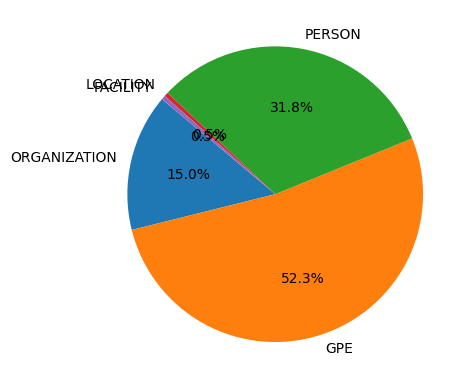

In [ ]:
# Create the defaultdict: ner_categories


# Create the nested for loop
# Loop over chunked_sentences (with sent variable)

    # Loop over sent (with chunk variable)
    
        # if chunk has attribute 'label'
        
            # add 1 to ner_categories dictionary with key chunk.label()
            
            
# Create a list from the dictionary keys for the chart labels and assign to a variable labels


# Create a list of the values and assign to a variable values
# Loop over the labels (named entities) and get the value - number of occurrences for each named entity


# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### 3. Comparing NLTK with spaCy NER

Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as `article`. To minimize execution times, you'll be asked to specify the keyword argument `disable=['tagger', 'parser', 'matcher']` when loading the spaCy model, because you only care about the `entity` in this exercise.

#### Instructions

- Import `spacy`.
- Load the `'en_core_web_sm'` model using `spacy.load()`. Specify the additional keyword arguments `disable=['tagger', 'parser', 'matcher']`.
- Create a `spacy` document object by passing `article` into `nlp()`.
- Using `ent` as your iterator variable, iterate over the entities of `doc` and print out the labels (`ent.label_`) and text (`ent.text`).

In [ ]:
# Import spacy


# Instantiate the English model and assign to variable nlp
# nlp = spacy.load('en', tagger=False, parser=False, matcher=False)


# Create a new spacy document object and assign to variable doc


# Print all of the found entities and their labels
# Loop over doc.ents using ent as your iterator variable, iterate over the entities of doc and print out the labels (ent.label_) and text (ent.text)



ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


#### spaCy NER Categories
Which are the extra categories that `spacy` uses compared to `nltk` in its named-entity recognition?

##### Possible Answers

- (a) GPE, PERSON, MONEY
- (b) ORGANIZATION, WORKOFART
- (c) NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT
- (d) EVENT_LOCATION, FIGURE